<a href="https://colab.research.google.com/github/sheikh495/MachineLearning/blob/main/M7_8_Homework_Converting_Data_Into_A_Vector_Space_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Other##

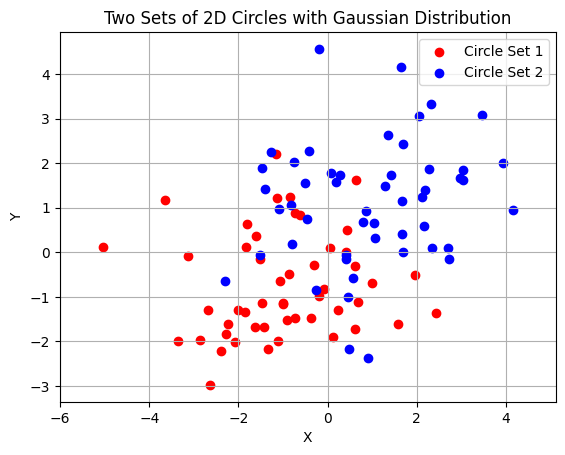

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets

np.random.seed(5)  # make our point generation deterministic
spread = 2

# Generate random points for the first circle set
num_samples = 50
mean_center1 = [-1, -1]
covariance1 = [[spread, 0], [0, spread]]
circle_set1 = np.random.multivariate_normal(mean_center1, covariance1, num_samples)

# Generate random points for the second circle set
mean_center2 = [1, 1]
covariance2 = [[spread, 0], [0, spread]]
circle_set2 = np.random.multivariate_normal(mean_center2, covariance2, num_samples)

# set X and Y
X = np.r_[circle_set1, circle_set2]
Y = [0] * num_samples + [1] * num_samples

plt.scatter(circle_set1[:, 0], circle_set1[:, 1], label='Circle Set 1', color='red')
plt.scatter(circle_set2[:, 0], circle_set2[:, 1], label='Circle Set 2', color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Two Sets of 2D Circles with Gaussian Distribution')
plt.legend()
plt.axis('equal')  # Equal aspect ratio for a better visualization
plt.grid(True)
plt.savefig("2d-before-svm.pdf", format="pdf", bbox_inches="tight")
plt.savefig("2d-before-svm.svg", format="svg", bbox_inches="tight")
plt.show()


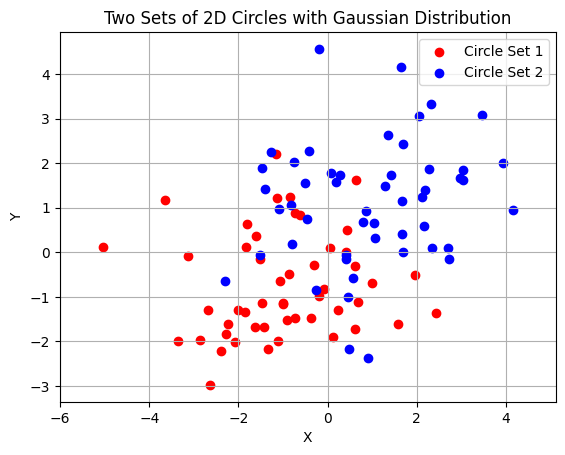

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets

np.random.seed(5)#make our point generation deterministic
spread = 2

# Generate random points for the first circle set
num_samples = 50
mean_center1 = [-1, -1]
covariance1 = [[spread, 0], [0, spread]]
circle_set1 = np.random.multivariate_normal(mean_center1, covariance1, num_samples)

# Generate random points for the second circle set
mean_center2 = [1, 1]
covariance2 = [[spread, 0], [0, spread]]
circle_set2 = np.random.multivariate_normal(mean_center2, covariance2, num_samples)

#set X and Y
X = np.r_[ circle_set1, circle_set2]
Y = [0] * num_samples + [1] * num_samples

plt.scatter(circle_set1[:, 0], circle_set1[:, 1], label='Circle Set 1', color='red')
plt.scatter(circle_set2[:, 0], circle_set2[:, 1], label='Circle Set 2', color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Two Sets of 2D Circles with Gaussian Distribution')
plt.legend()
plt.axis('equal')# Equal aspect ratio for a better visualization
plt.grid(True)
plt.savefig("2d-before-svm.pdf", format="pdf", bbox_inches="tight")
plt.savefig("2d-before-svm.svg", format="svg", bbox_inches="tight")
plt.show()

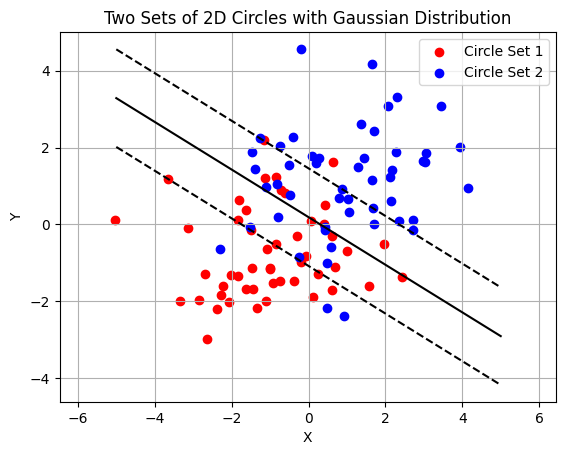

In [ ]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X,Y)

# get the separating hyperplane
w = svm_classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (svm_classifier.intercept_[0]) / w[1]

margin = 1 / np.sqrt(np.sum(svm_classifier.coef_**2))
yy_down = yy - np.sqrt(1 + a**2) * margin
yy_up = yy + np.sqrt(1 + a**2) * margin

#Plot hyperplane
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k--")
plt.plot(xx, yy_up, "k--")

# Plot the circles
plt.scatter(circle_set1[:, 0], circle_set1[:, 1], label='Circle Set 1',color='red')
plt.scatter(circle_set2[:, 0], circle_set2[:, 1], label='Circle Set 2', color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Two Sets of 2D Circles with Gaussian Distribution')
plt.legend()
plt.axis('equal')# Equal aspect ratio for a better visualization
plt.grid(True)
plt.savefig("2d-after-svm.pdf", format="pdf", bbox_inches="tight")
plt.savefig("2d-after-svm.svg", format="svg", bbox_inches="tight")
plt.show()

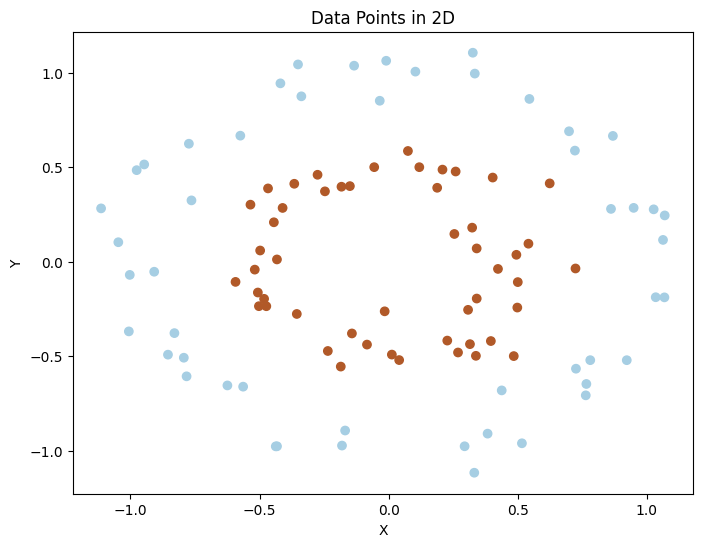

In [ ]:
# Generate non-linearly separable 2D data
X, y = datasets.make_circles(n_samples=100, factor=0.5, noise=0.1)

# Create a third feature based on the original data
X_3d = np.column_stack((X[:, 0], X[:, 1], X[:, 0] ** 2 + X[:, 1] ** 2))

# Plot the data points in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Data Points in 2D")
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig("svm-before-ktrick.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
# Create a third feature based on the original data
X_3d = np.column_stack((X[:, 0], X[:, 1], X[:, 0] ** 2 + X[:, 1] ** 2))

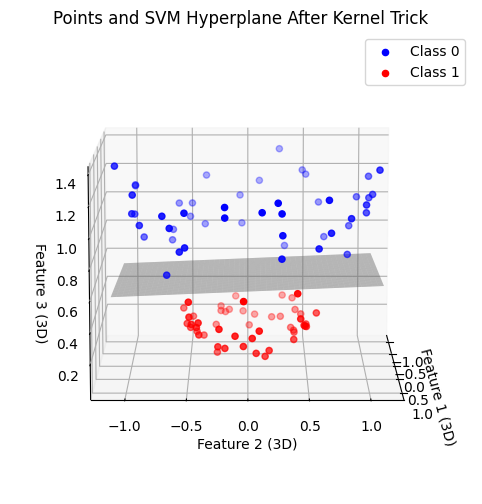

In [ ]:
# Create and fit an SVM classifier with a polynomial kernel
clf = SVC(kernel='linear')
clf.fit(X_3d, y)

# Plot the data points in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Set the elevation and azimuth angles for the view
ax.view_init(elev=10, azim=0)

# Separate data points by class
ax.scatter(X_3d[y == 0][:, 0], X_3d[y == 0][:, 1], X_3d[y == 0][:, 2], color="blue", label='Class 0')
ax.scatter(X_3d[y == 1][:, 0], X_3d[y == 1][:, 1], X_3d[y == 1][:, 2], color="red", label='Class 1')

# Plot the hyperplane
xx, yy = np.meshgrid(np.linspace(X_3d[:, 0].min(), X_3d[:, 0].max(), 50),
                     np.linspace(X_3d[:, 1].min(), X_3d[:, 1].max(), 50))
zz = (-clf.intercept_[0] - clf.coef_[0, 0] * xx - clf.coef_[0, 1] * yy) / clf.coef_[0, 2]
ax.plot_surface(xx, yy, zz, color='gray', alpha=0.5)

ax.set_xlabel("Feature 1 (3D)")
ax.set_ylabel("Feature 2 (3D)")
ax.set_zlabel("Feature 3 (3D)")

plt.title("Points and SVM Hyperplane After Kernel Trick")
plt.legend()
plt.savefig("svm-after-ktrick-wsvm.pdf", format="pdf", bbox_inches="tight")
plt.savefig("svm-after-ktrick-wsvm.svg", format="svg", bbox_inches="tight")
plt.show()

In [ ]:
import pandas as pd

# Office Supply Sales Data
data = {
    'Region': ['East', 'Central', 'Central', 'Central', 'West', 'East'],
    'Rep': ['Jones', 'Kivell', 'Jardine', 'Gill', 'Sorvino', 'Jones'],
    'Item': ['Pencil', 'Binder', 'Pencil', 'Pen', 'Pencil', 'Binder'],
    'Units': [95, 50, 36, 27, 56, 60],
    'UnitCost': [1.99, 19.99, 4.99, 19.99, 2.99, 4.99],
    'Total': [189.05, 999.5, 179.64, 539.73, 167.44, 299.4]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


    Region      Rep    Item  Units  UnitCost   Total
0     East    Jones  Pencil     95      1.99  189.05
1  Central   Kivell  Binder     50     19.99  999.50
2  Central  Jardine  Pencil     36      4.99  179.64
3  Central     Gill     Pen     27     19.99  539.73
4     West  Sorvino  Pencil     56      2.99  167.44
5     East    Jones  Binder     60      4.99  299.40


In [ ]:
# Office Supply Sales Data
data = {
    'Region': ['East', 'Central', 'Central', 'Central', 'West', 'East'],
    'Rep': ['Jones', 'Kivell', 'Jardine', 'Gill', 'Sorvino', 'Jones'],
    'Item': ['Pencil', 'Binder', 'Pencil', 'Pen', 'Pencil', 'Binder'],
    'Units': [95, 50, 36, 27, 56, 60],
    'UnitCost': [1.99, 19.99, 4.99, 19.99, 2.99, 4.99],
    'Total': [189.05, 999.5, 179.64, 539.73, 167.44, 299.4]
}

# Print the table with numerical values for each row
print("Office Supply Sales Data:")
print("Region\tRep\tItem\tUnits\tUnitCost\tTotal")
for i in range(len(data['Region'])):
    print(f"{data['Region'][i]}\t{data['Rep'][i]}\t{data['Item'][i]}\t{data['Units'][i]}\t{data['UnitCost'][i]}\t\t{data['Total'][i]}")


Office Supply Sales Data:
Region	Rep	Item	Units	UnitCost	Total
East	Jones	Pencil	95	1.99		189.05
Central	Kivell	Binder	50	19.99		999.5
Central	Jardine	Pencil	36	4.99		179.64
Central	Gill	Pen	27	19.99		539.73
West	Sorvino	Pencil	56	2.99		167.44
East	Jones	Binder	60	4.99		299.4


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample rows of text
rows_of_text = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the text data and transform the text into a bag-of-words representation
bow_representation = vectorizer.fit_transform(rows_of_text)

# Convert the sparse matrix representation to a dense array for easier manipulation
bow_array = bow_representation.toarray()

# Print the vocabulary (unique words in the text)
print("Vocabulary:")
print(vectorizer.get_feature_names_out())

# Print the bag-of-words representation
print("\nBag-of-Words Representation:")
print(bow_array)


Vocabulary:
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']

Bag-of-Words Representation:
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [ ]:
import pandas as pd

# Office Supply Sales Data
data = {
    'Region': ['East', 'Central', 'Central', 'Central', 'West', 'East'],
    'Rep': ['Jones', 'Kivell', 'Jardine', 'Gill', 'Sorvino', 'Jones'],
    'Item': ['Pencil', 'Binder', 'Pencil', 'Pen', 'Pencil', 'Binder'],
    'Units': [95, 50, 36, 27, 56, 60],
    'UnitCost': [1.99, 19.99, 4.99, 19.99, 2.99, 4.99],
    'Total': [189.05, 999.5, 179.64, 539.73, 167.44, 299.4]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Region', 'Rep', 'Item'])

# Display the DataFrame with encoded features
print(df_encoded)


   Units  UnitCost   Total  Region_Central  Region_East  Region_West  \
0     95      1.99  189.05           False         True        False   
1     50     19.99  999.50            True        False        False   
2     36      4.99  179.64            True        False        False   
3     27     19.99  539.73            True        False        False   
4     56      2.99  167.44           False        False         True   
5     60      4.99  299.40           False         True        False   

   Rep_Gill  Rep_Jardine  Rep_Jones  Rep_Kivell  Rep_Sorvino  Item_Binder  \
0     False        False       True       False        False        False   
1     False        False      False        True        False         True   
2     False         True      False       False        False        False   
3      True        False      False       False        False        False   
4     False        False      False       False         True        False   
5     False        False       Tr

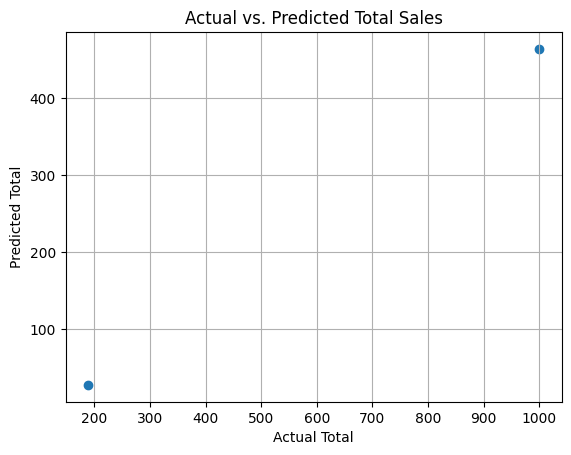

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import pandas as pd

# Office Supply Sales Data represented as a vector space model
data = {
    'Region_East': [1, 0, 0, 0, 0, 1],
    'Region_Central': [0, 1, 1, 1, 0, 0],
    'Region_West': [0, 0, 0, 0, 1, 0],
    'Rep_Jones': [1, 0, 0, 0, 0, 1],
    'Rep_Kivell': [0, 1, 0, 0, 0, 0],
    'Rep_Jardine': [0, 0, 1, 0, 0, 0],
    'Rep_Gill': [0, 0, 0, 1, 0, 0],
    'Rep_Sorvino': [0, 0, 0, 0, 1, 0],
    'Item_Pencil': [1, 0, 1, 0, 1, 0],
    'Item_Binder': [0, 1, 0, 0, 0, 1],
    'Item_Pen': [0, 0, 0, 1, 0, 0],
    'Units': [95, 50, 36, 27, 56, 60],
    'UnitCost': [1.99, 19.99, 4.99, 19.99, 2.99, 4.99],
    'Total': [189.05, 999.5, 179.64, 539.73, 167.44, 299.4]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Extract features (X) and target (Y)
X = df.drop(columns=['Total']).values
Y = df['Total'].values

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit SVR model
model = SVR(kernel='linear')
model.fit(X_train, Y_train)

# Predict on the testing set
Y_pred = model.predict(X_test)

# Plot the predicted vs. actual values
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual Total')
plt.ylabel('Predicted Total')
plt.title('Actual vs. Predicted Total Sales')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Office Supply Sales Data
data = {
    'Region': ['East', 'Central', 'Central', 'Central', 'West', 'East'],
    'Rep': ['Jones', 'Kivell', 'Jardine', 'Gill', 'Sorvino', 'Jones'],
    'Item': ['Pencil', 'Binder', 'Pencil', 'Pen', 'Pencil', 'Binder'],
    'Units': [95, 50, 36, 27, 56, 60],
    'UnitCost': [1.99, 19.99, 4.99, 19.99, 2.99, 4.99],
    'Total': [189.05, 999.5, 179.64, 539.73, 167.44, 299.4]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Region', 'Rep', 'Item'])

# Display the DataFrame with encoded features
print(df_encoded)


   Units  UnitCost   Total  Region_Central  Region_East  Region_West  \
0     95      1.99  189.05           False         True        False   
1     50     19.99  999.50            True        False        False   
2     36      4.99  179.64            True        False        False   
3     27     19.99  539.73            True        False        False   
4     56      2.99  167.44           False        False         True   
5     60      4.99  299.40           False         True        False   

   Rep_Gill  Rep_Jardine  Rep_Jones  Rep_Kivell  Rep_Sorvino  Item_Binder  \
0     False        False       True       False        False        False   
1     False        False      False        True        False         True   
2     False         True      False       False        False        False   
3      True        False      False       False        False        False   
4     False        False      False       False         True        False   
5     False        False       Tr

##Problem 1##

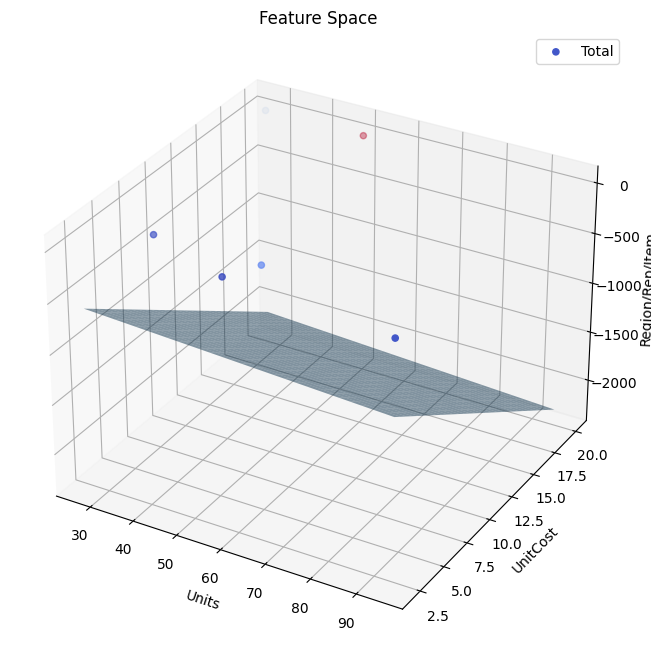

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Office Supply Sales Data
data_sales = {
    'Region': ['East', 'Central', 'Central', 'Central', 'West', 'East'],
    'Rep': ['Jones', 'Kivell', 'Jardine', 'Gill', 'Sorvino', 'Jones'],
    'Item': ['Pencil', 'Binder', 'Pencil', 'Pen', 'Pencil', 'Binder'],
    'Units': [95, 50, 36, 27, 56, 60],
    'UnitCost': [1.99, 19.99, 4.99, 19.99, 2.99, 4.99],
    'Total': [189.05, 999.5, 179.64, 539.73, 167.44, 299.4]
}

# Convert data to DataFrame
df_sales = pd.DataFrame(data_sales)

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_sales, columns=['Region', 'Rep', 'Item'])

# Extract input features and target variable
X = df_encoded.drop(columns=['Total']).values  # Features
y = df_encoded['Total'].values  # Target variable

# Create SVM regressor
svm_regressor = svm.SVR(kernel='linear')

# Fit SVM regressor
svm_regressor.fit(X, y)

# Visualize feature space in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the feature space with actual data points
regions = df_sales['Region'].map({'East': 0, 'Central': 1, 'West': 2})
reps = df_sales['Rep'].map({'Jones': 0, 'Kivell': 1, 'Jardine': 2, 'Gill': 3, 'Sorvino': 4})
items = df_sales['Item'].map({'Pencil': 0, 'Binder': 1, 'Pen': 2})
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.coolwarm, label='Total')

# Plot decision boundary in feature space
xx, yy = np.meshgrid(np.linspace(min(X[:, 0]), max(X[:, 0]), 30),
                     np.linspace(min(X[:, 1]), max(X[:, 1]), 30))
zz = (-svm_regressor.intercept_[0] - svm_regressor.coef_[0][0] * xx - svm_regressor.coef_[0][1] * yy) / svm_regressor.coef_[0][2]
ax.plot_surface(xx, yy, zz, alpha=0.5)

ax.set_xlabel('Units')
ax.set_ylabel('UnitCost')
ax.set_zlabel('Region/Rep/Item')
ax.set_title('Feature Space')

ax.legend()
plt.show()


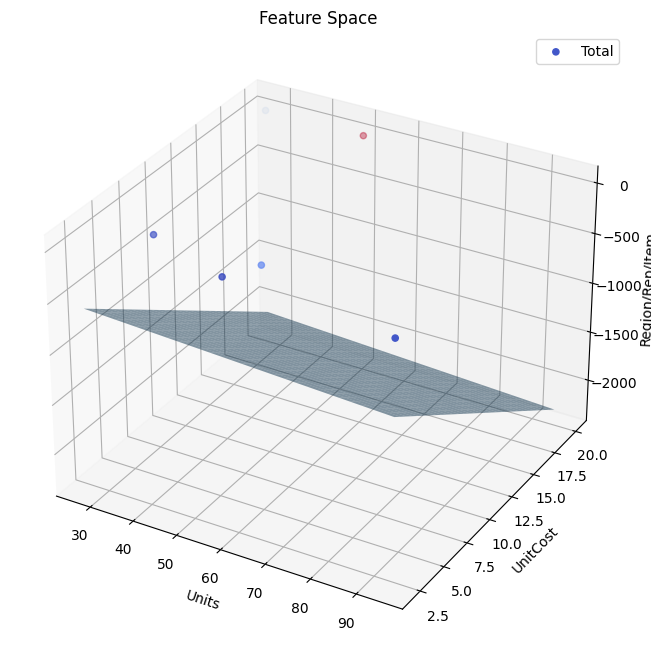

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Office Supply Sales Data
data_sales = {
    'Region': ['East', 'Central', 'Central', 'Central', 'West', 'East'],
    'Rep': ['Jones', 'Kivell', 'Jardine', 'Gill', 'Sorvino', 'Jones'],
    'Item': ['Pencil', 'Binder', 'Pencil', 'Pen', 'Pencil', 'Binder'],
    'Units': [95, 50, 36, 27, 56, 60],
    'UnitCost': [1.99, 19.99, 4.99, 19.99, 2.99, 4.99],
    'Total': [189.05, 999.5, 179.64, 539.73, 167.44, 299.4]
}

# Convert data to DataFrame
df_sales = pd.DataFrame(data_sales)

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_sales, columns=['Region', 'Rep', 'Item'])

# Extract input features and target variable
X = df_encoded.drop(columns=['Total']).values  # Features
y = df_encoded['Total'].values  # Target variable

# Create SVM regressor
svm_regressor = svm.SVR(kernel='linear')

# Fit SVM regressor
svm_regressor.fit(X, y)

# Visualize feature space in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the feature space with actual data points
regions = df_sales['Region'].map({'East': 0, 'Central': 1, 'West': 2})
reps = df_sales['Rep'].map({'Jones': 0, 'Kivell': 1, 'Jardine': 2, 'Gill': 3, 'Sorvino': 4})
items = df_sales['Item'].map({'Pencil': 0, 'Binder': 1, 'Pen': 2})
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.coolwarm, label='Total')

# Plot decision boundary in feature space
xx, yy = np.meshgrid(np.linspace(min(X[:, 0]), max(X[:, 0]), 30),
                     np.linspace(min(X[:, 1]), max(X[:, 1]), 30))
zz = (-svm_regressor.intercept_[0] - svm_regressor.coef_[0][0] * xx - svm_regressor.coef_[0][1] * yy) / svm_regressor.coef_[0][2]
ax.plot_surface(xx, yy, zz, alpha=0.5)

ax.set_xlabel('Units')
ax.set_ylabel('UnitCost')
ax.set_zlabel('Region/Rep/Item')
ax.set_title('Feature Space')

ax.legend()
plt.show()


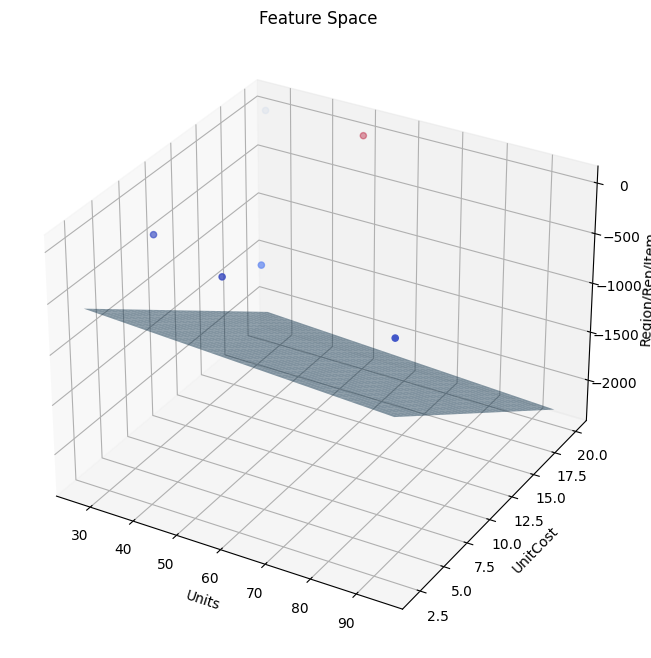

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Office Supply Sales Data
data_sales = {
    'Region': ['East', 'Central', 'Central', 'Central', 'West', 'East'],
    'Rep': ['Jones', 'Kivell', 'Jardine', 'Gill', 'Sorvino', 'Jones'],
    'Item': ['Pencil', 'Binder', 'Pencil', 'Pen', 'Pencil', 'Binder'],
    'Units': [95, 50, 36, 27, 56, 60],
    'UnitCost': [1.99, 19.99, 4.99, 19.99, 2.99, 4.99],
    'Total': [189.05, 999.5, 179.64, 539.73, 167.44, 299.4]
}

# Convert data to DataFrame
df_sales = pd.DataFrame(data_sales)

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_sales, columns=['Region', 'Rep', 'Item'])

# Extract input features and target variable
X = df_encoded.drop(columns=['Total']).values  # Features
y = df_encoded['Total'].values  # Target variable

# Create SVM regressor
svm_regressor = svm.SVR(kernel='linear')

# Fit SVM regressor
svm_regressor.fit(X, y)

# Visualize feature space in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the feature space
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.coolwarm)
ax.set_xlabel('Units')
ax.set_ylabel('UnitCost')
ax.set_zlabel('Region/Rep/Item')
ax.set_title('Feature Space')

# Plot decision boundary in feature space
xx, yy = np.meshgrid(np.linspace(min(X[:, 0]), max(X[:, 0]), 30),
                     np.linspace(min(X[:, 1]), max(X[:, 1]), 30))
zz = (-svm_regressor.intercept_[0] - svm_regressor.coef_[0][0] * xx - svm_regressor.coef_[0][1] * yy) / svm_regressor.coef_[0][2]
ax.plot_surface(xx, yy, zz, alpha=0.5)

plt.show()


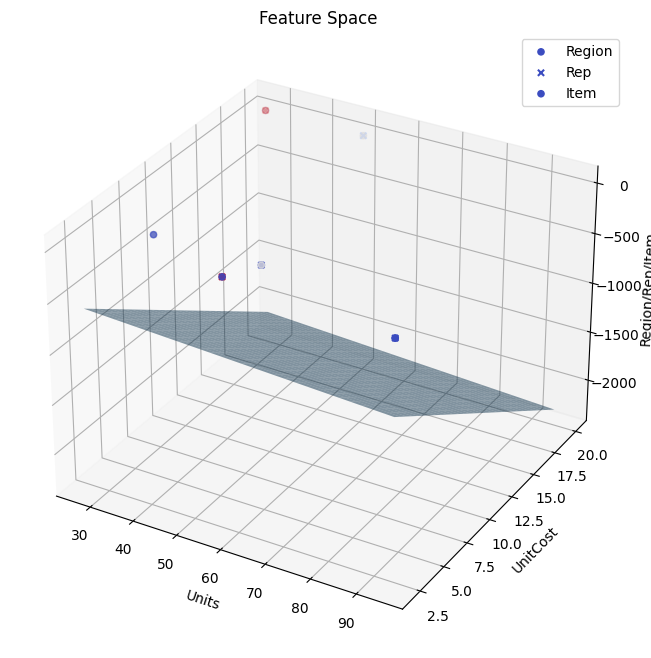

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Office Supply Sales Data
data_sales = {
    'Region': ['East', 'Central', 'Central', 'Central', 'West', 'East'],
    'Rep': ['Jones', 'Kivell', 'Jardine', 'Gill', 'Sorvino', 'Jones'],
    'Item': ['Pencil', 'Binder', 'Pencil', 'Pen', 'Pencil', 'Binder'],
    'Units': [95, 50, 36, 27, 56, 60],
    'UnitCost': [1.99, 19.99, 4.99, 19.99, 2.99, 4.99],
    'Total': [189.05, 999.5, 179.64, 539.73, 167.44, 299.4]
}

# Convert data to DataFrame
df_sales = pd.DataFrame(data_sales)

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_sales, columns=['Region', 'Rep', 'Item'])

# Extract input features and target variable
X = df_encoded.drop(columns=['Total']).values  # Features
y = df_encoded['Total'].values  # Target variable

# Create SVM regressor
svm_regressor = svm.SVR(kernel='linear')

# Fit SVM regressor
svm_regressor.fit(X, y)

# Visualize feature space in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the feature space
regions = df_sales['Region'].map({'East': 0, 'Central': 1, 'West': 2})
reps = df_sales['Rep'].map({'Jones': 0, 'Kivell': 1, 'Jardine': 2, 'Gill': 3, 'Sorvino': 4})
items = df_sales['Item'].map({'Pencil': 0, 'Binder': 1, 'Pen': 2})
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=regions, cmap=plt.cm.coolwarm, label='Region')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=reps, cmap=plt.cm.coolwarm, marker='x', label='Rep')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=items, cmap=plt.cm.coolwarm, marker='o', label='Item')
ax.set_xlabel('Units')
ax.set_ylabel('UnitCost')
ax.set_zlabel('Region/Rep/Item')
ax.set_title('Feature Space')

# Plot decision boundary in feature space
xx, yy = np.meshgrid(np.linspace(min(X[:, 0]), max(X[:, 0]), 30),
                     np.linspace(min(X[:, 1]), max(X[:, 1]), 30))
zz = (-svm_regressor.intercept_[0] - svm_regressor.coef_[0][0] * xx - svm_regressor.coef_[0][1] * yy) / svm_regressor.coef_[0][2]
ax.plot_surface(xx, yy, zz, alpha=0.5)

ax.legend()

plt.show()


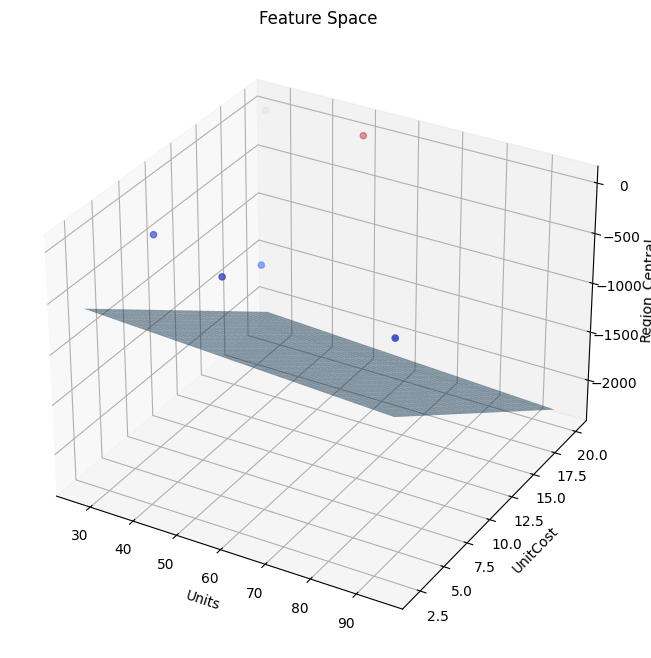

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Office Supply Sales Data
data_sales = {
    'Region': ['East', 'Central', 'Central', 'Central', 'West', 'East'],
    'Rep': ['Jones', 'Kivell', 'Jardine', 'Gill', 'Sorvino', 'Jones'],
    'Item': ['Pencil', 'Binder', 'Pencil', 'Pen', 'Pencil', 'Binder'],
    'Units': [95, 50, 36, 27, 56, 60],
    'UnitCost': [1.99, 19.99, 4.99, 19.99, 2.99, 4.99],
    'Total': [189.05, 999.5, 179.64, 539.73, 167.44, 299.4]
}

# Convert data to DataFrame
df_sales = pd.DataFrame(data_sales)

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_sales, columns=['Region', 'Rep', 'Item'])

# Extract input features and target variable
X = df_encoded.drop(columns=['Total']).values  # Features
y = df_encoded['Total'].values  # Target variable

# Create SVM regressor
svm_regressor = svm.SVR(kernel='linear')

# Fit SVM regressor
svm_regressor.fit(X, y)

# Visualize feature space in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the feature space
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.coolwarm)
ax.set_xlabel('Units')
ax.set_ylabel('UnitCost')
ax.set_zlabel('Region_Central')  # One-hot encoded feature
ax.set_title('Feature Space')

# Plot decision boundary in feature space
xx, yy = np.meshgrid(np.linspace(min(X[:, 0]), max(X[:, 0]), 30),
                     np.linspace(min(X[:, 1]), max(X[:, 1]), 30))
zz = (-svm_regressor.intercept_[0] - svm_regressor.coef_[0][0] * xx - svm_regressor.coef_[0][1] * yy) / svm_regressor.coef_[0][2]
ax.plot_surface(xx, yy, zz, alpha=0.5)

plt.show()


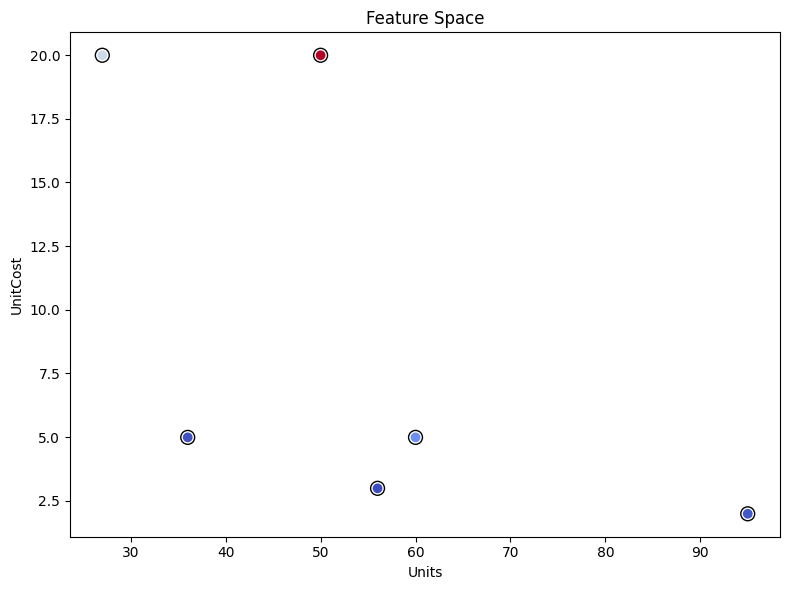

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd

# Office Supply Sales Data
data_sales = {
    'Region': ['East', 'Central', 'Central', 'Central', 'West', 'East'],
    'Rep': ['Jones', 'Kivell', 'Jardine', 'Gill', 'Sorvino', 'Jones'],
    'Item': ['Pencil', 'Binder', 'Pencil', 'Pen', 'Pencil', 'Binder'],
    'Units': [95, 50, 36, 27, 56, 60],
    'UnitCost': [1.99, 19.99, 4.99, 19.99, 2.99, 4.99],
    'Total': [189.05, 999.5, 179.64, 539.73, 167.44, 299.4]
}

# Convert data to DataFrame
df_sales = pd.DataFrame(data_sales)

# Extract input features and target variable
X = df_sales[['Units', 'UnitCost']].values  # Features
y = df_sales['Total'].values  # Target variable

# Create SVM regressor
svm_regressor = svm.SVR(kernel='linear')

# Fit SVM regressor
svm_regressor.fit(X, y)

# Visualize feature space
plt.figure(figsize=(8, 6))

# Scatter plot of the feature space
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Units')
plt.ylabel('UnitCost')
plt.title('Feature Space')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)

# Flatten and concatenate the grid coordinates
grid = np.c_[XX.ravel(), YY.ravel()]

# Predict on the grid
Z = svm_regressor.predict(grid).reshape(XX.shape)

# Plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.scatter(svm_regressor.support_vectors_[:, 0], svm_regressor.support_vectors_[:, 1],
            s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.tight_layout()
plt.show()


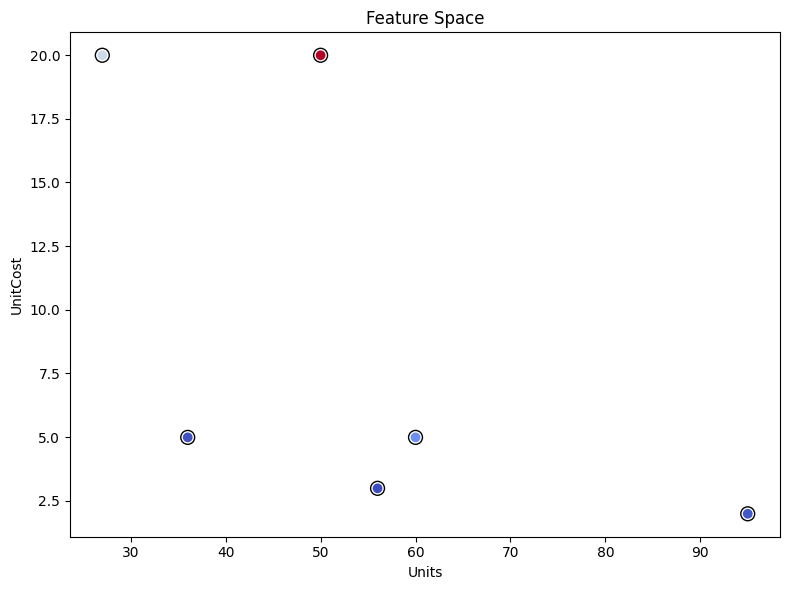

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd

# Office Supply Sales Data
data_sales = {
    'Region': ['East', 'Central', 'Central', 'Central', 'West', 'East'],
    'Rep': ['Jones', 'Kivell', 'Jardine', 'Gill', 'Sorvino', 'Jones'],
    'Item': ['Pencil', 'Binder', 'Pencil', 'Pen', 'Pencil', 'Binder'],
    'Units': [95, 50, 36, 27, 56, 60],
    'UnitCost': [1.99, 19.99, 4.99, 19.99, 2.99, 4.99],
    'Total': [189.05, 999.5, 179.64, 539.73, 167.44, 299.4]
}

# Convert data to DataFrame
df_sales = pd.DataFrame(data_sales)

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_sales, columns=['Region', 'Rep', 'Item'])

# Extract input features and target variable
X = df_encoded.drop(columns=['Total']).values  # Features
y = df_encoded['Total'].values  # Target variable

# Create SVM regressor
svm_regressor = svm.SVR(kernel='linear')

# Fit SVM regressor
svm_regressor.fit(X, y)

# Visualize feature space
plt.figure(figsize=(8, 6))

# Scatter plot of the feature space
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Units')
plt.ylabel('UnitCost')
plt.title('Feature Space')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)

# Flatten and concatenate the grid coordinates
grid = np.c_[XX.ravel(), YY.ravel()]
grid_encoded = np.hstack((grid, np.zeros((len(grid), X.shape[1] - 2))))  # Add zeros for one-hot encoded columns

# Predict on the grid
Z = svm_regressor.predict(grid_encoded).reshape(XX.shape)

# Plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.scatter(svm_regressor.support_vectors_[:, 0], svm_regressor.support_vectors_[:, 1],
            s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.tight_layout()
plt.show()


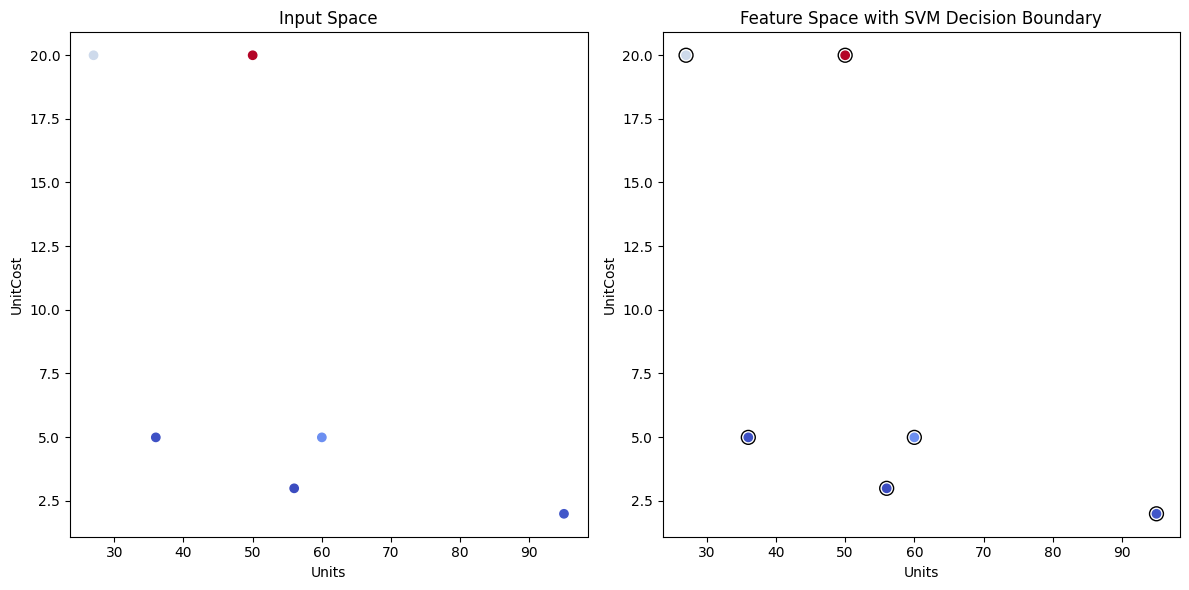

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd

# Office Supply Sales Data
data_sales = {
    'Region': ['East', 'Central', 'Central', 'Central', 'West', 'East'],
    'Rep': ['Jones', 'Kivell', 'Jardine', 'Gill', 'Sorvino', 'Jones'],
    'Item': ['Pencil', 'Binder', 'Pencil', 'Pen', 'Pencil', 'Binder'],
    'Units': [95, 50, 36, 27, 56, 60],
    'UnitCost': [1.99, 19.99, 4.99, 19.99, 2.99, 4.99],
    'Total': [189.05, 999.5, 179.64, 539.73, 167.44, 299.4]
}

# Convert data to DataFrame
df_sales = pd.DataFrame(data_sales)

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_sales, columns=['Region', 'Rep', 'Item'])

# Extract input features and target variable
X = df_encoded.drop(columns=['Total']).values  # Features
y = df_encoded['Total'].values  # Target variable

# Create SVM regressor
svm_regressor = svm.SVR(kernel='linear')

# Fit SVM regressor
svm_regressor.fit(X, y)

# Visualize input space
plt.figure(figsize=(12, 6))

# Plot data points in input space
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Units')
plt.ylabel('UnitCost')
plt.title('Input Space')

# Visualize feature space
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Units')
plt.ylabel('UnitCost')
plt.title('Feature Space')

# Plot separating hyperplane in feature space
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)

# Flatten and concatenate the grid coordinates
grid = np.c_[XX.ravel(), YY.ravel()]
grid_encoded = np.hstack((grid, np.zeros((len(grid), X.shape[1] - 2))))  # Add zeros for one-hot encoded columns

# Predict on the grid
Z = svm_regressor.predict(grid_encoded).reshape(XX.shape)

# Plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.scatter(svm_regressor.support_vectors_[:, 0], svm_regressor.support_vectors_[:, 1],
            s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('Units')
plt.ylabel('UnitCost')
plt.title('Feature Space with SVM Decision Boundary')

plt.tight_layout()
plt.show()


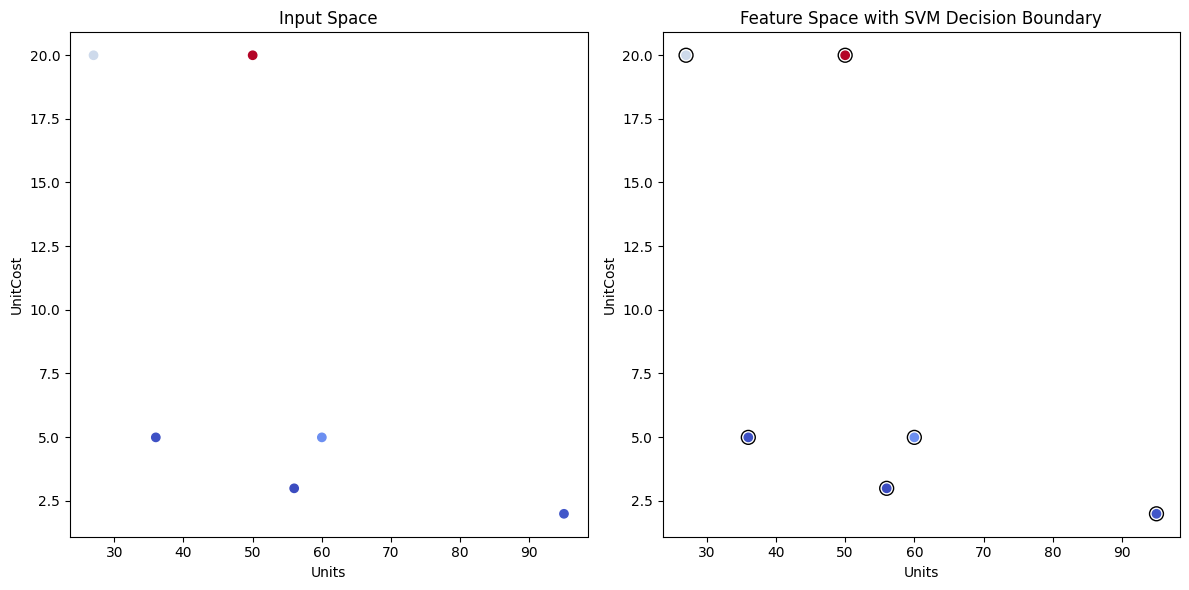

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd

# Office Supply Sales Data
data_sales = {
    'Region': ['East', 'Central', 'Central', 'Central', 'West', 'East'],
    'Rep': ['Jones', 'Kivell', 'Jardine', 'Gill', 'Sorvino', 'Jones'],
    'Item': ['Pencil', 'Binder', 'Pencil', 'Pen', 'Pencil', 'Binder'],
    'Units': [95, 50, 36, 27, 56, 60],
    'UnitCost': [1.99, 19.99, 4.99, 19.99, 2.99, 4.99],
    'Total': [189.05, 999.5, 179.64, 539.73, 167.44, 299.4]
}

# Convert data to DataFrame
df_sales = pd.DataFrame(data_sales)

# Extract input features and target variable
X = df_sales[['Units', 'UnitCost']].values
y = df_sales['Total'].values

# Create SVM classifier
svm_classifier = svm.SVR(kernel='linear')

# Fit SVM classifier
svm_classifier.fit(X, y)

# Visualize input space
plt.figure(figsize=(12, 6))

# Plot data points in input space
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Units')
plt.ylabel('UnitCost')
plt.title('Input Space')

# Visualize feature space
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Units')
plt.ylabel('UnitCost')
plt.title('Feature Space')

# Plot separating hyperplane in feature space
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_classifier.predict(xy).reshape(XX.shape)

# Plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1],
            s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('Units')
plt.ylabel('UnitCost')
plt.title('Feature Space with SVM Decision Boundary')

plt.tight_layout()
plt.show()


In [ ]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Loading the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the SVM model
svm_model = SVC(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

# Making predictions
y_pred = svm_model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
import pandas as pd
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Office Supply Sales Data
data_sales = {
    'Region': ['East', 'Central', 'Central', 'Central', 'West', 'East'],
    'Rep': ['Jones', 'Kivell', 'Jardine', 'Gill', 'Sorvino', 'Jones'],
    'Item': ['Pencil', 'Binder', 'Pencil', 'Pen', 'Pencil', 'Binder'],
    'Units': [95, 50, 36, 27, 56, 60],
    'UnitCost': [1.99, 19.99, 4.99, 19.99, 2.99, 4.99],
    'Total': [189.05, 999.5, 179.64, 539.73, 167.44, 299.4]
}

# Convert Office Supply Sales Data to DataFrame
df_sales = pd.DataFrame(data_sales)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_sales, columns=['Region', 'Rep', 'Item'])

# Generate synthetic data for two circles
X_circles, _ = make_circles(n_samples=100, noise=0.1, random_state=42)

# Convert the synthetic data into a DataFrame
df_circles = pd.DataFrame(X_circles, columns=['Circle1_X', 'Circle1_Y'])

# Combine the synthetic data with the existing Office Supply Sales Data
df_combined = pd.concat([df_encoded, df_circles], axis=1)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_combined_imputed = pd.DataFrame(imputer.fit_transform(df_combined), columns=df_combined.columns)

# Split data into features (X) and target variable (y)
X = df_combined_imputed.drop(columns=['Total'])
y = df_combined_imputed['Total']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVR
linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

# Predictions
linear_predictions = linear_svr.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, linear_predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 2247.663820408018


Mean Squared Error: 156543.10334918002


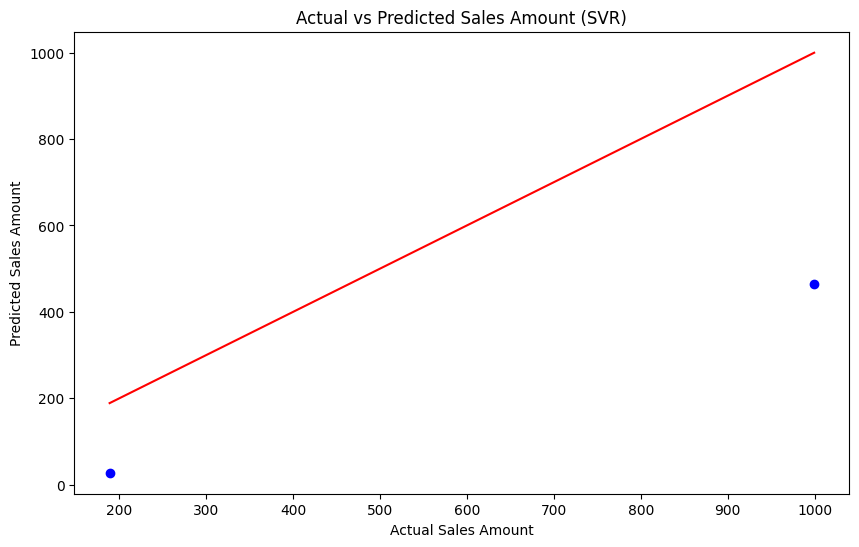

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Office Supply Sales Data
data = {
    'Region': ['East', 'Central', 'Central', 'Central', 'West', 'East'],
    'Rep': ['Jones', 'Kivell', 'Jardine', 'Gill', 'Sorvino', 'Jones'],
    'Item': ['Pencil', 'Binder', 'Pencil', 'Pen', 'Pencil', 'Binder'],
    'Units': [95, 50, 36, 27, 56, 60],
    'UnitCost': [1.99, 19.99, 4.99, 19.99, 2.99, 4.99],
    'Total': [189.05, 999.5, 179.64, 539.73, 167.44, 299.4]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Region', 'Rep', 'Item'])

# Split data into features (X) and target variable (y)
X = df_encoded.drop(columns=['Total'])
y = df_encoded['Total']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVR
linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

# Predictions
linear_predictions = linear_svr.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, linear_predictions)
print("Mean Squared Error:", mse)

# Plot actual vs predicted sales amounts
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_predictions, color='blue')
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Sales Amount')
plt.ylabel('Predicted Sales Amount')
plt.title('Actual vs Predicted Sales Amount (SVR)')
plt.show()


Linear SVR Mean Squared Error: 156543.10334918002


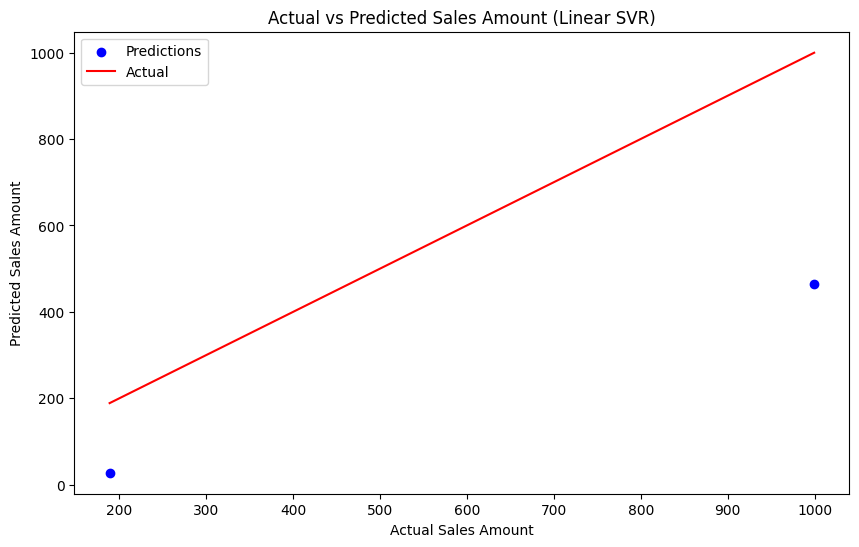

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Office Supply Sales Data
data = {
    'Region': ['East', 'Central', 'Central', 'Central', 'West', 'East'],
    'Rep': ['Jones', 'Kivell', 'Jardine', 'Gill', 'Sorvino', 'Jones'],
    'Item': ['Pencil', 'Binder', 'Pencil', 'Pen', 'Pencil', 'Binder'],
    'Units': [95, 50, 36, 27, 56, 60],
    'UnitCost': [1.99, 19.99, 4.99, 19.99, 2.99, 4.99],
    'Total': [189.05, 999.5, 179.64, 539.73, 167.44, 299.4]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Region', 'Rep', 'Item'])

# Split data into features (X) and target variable (y)
X = df_encoded.drop(columns=['Total'])
y = df_encoded['Total']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear SVR
linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

# Predictions
linear_predictions = linear_svr.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, linear_predictions)
print("Linear SVR Mean Squared Error:", mse)

# Plot actual vs predicted sales amounts
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_predictions, color='blue', label='Predictions')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual Sales Amount')
plt.ylabel('Predicted Sales Amount')
plt.title('Actual vs Predicted Sales Amount (Linear SVR)')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Office Supply Sales Data
data = {
    'Region': ['East', 'Central', 'Central', 'Central', 'West', 'East'],
    'Rep': ['Jones', 'Kivell', 'Jardine', 'Gill', 'Sorvino', 'Jones'],
    'Item': ['Pencil', 'Binder', 'Pencil', 'Pen', 'Pencil', 'Binder'],
    'Units': [95, 50, 36, 27, 56, 60],
    'UnitCost': [1.99, 19.99, 4.99, 19.99, 2.99, 4.99],
    'Total': [189.05, 999.5, 179.64, 539.73, 167.44, 299.4]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Region', 'Rep', 'Item'])

# Split data into features (X) and target variable (y)
X = df_encoded.drop(columns=['Total'])
y = df_encoded['Total']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear SVR
linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

# Predictions
linear_predictions = linear_svr.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, linear_predictions)
print("Linear SVR Mean Squared Error:", mse)


Linear SVR Mean Squared Error: 156543.10334918002


In [ ]:
import pandas as pd

# Office Supply Sales Data
data = {
    'Region': ['East', 'Central', 'Central', 'Central', 'West', 'East'],
    'Rep': ['Jones', 'Kivell', 'Jardine', 'Gill', 'Sorvino', 'Jones'],
    'Item': ['Pencil', 'Binder', 'Pencil', 'Pen', 'Pencil', 'Binder'],
    'Units': [95, 50, 36, 27, 56, 60],
    'UnitCost': [1.99, 19.99, 4.99, 19.99, 2.99, 4.99],
    'Total': [189.05, 999.5, 179.64, 539.73, 167.44, 299.4]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Region', 'Rep', 'Item'])

# Display the vector space model
print(df_encoded)


   Units  UnitCost   Total  Region_Central  Region_East  Region_West  \
0     95      1.99  189.05           False         True        False   
1     50     19.99  999.50            True        False        False   
2     36      4.99  179.64            True        False        False   
3     27     19.99  539.73            True        False        False   
4     56      2.99  167.44           False        False         True   
5     60      4.99  299.40           False         True        False   

   Rep_Gill  Rep_Jardine  Rep_Jones  Rep_Kivell  Rep_Sorvino  Item_Binder  \
0     False        False       True       False        False        False   
1     False        False      False        True        False         True   
2     False         True      False       False        False        False   
3      True        False      False       False        False        False   
4     False        False      False       False         True        False   
5     False        False       Tr

Office Supply Sales Data as a Vector Space Model:
[[95 1.99 189.05 False True False False False True False False False
  False True]
 [50 19.99 999.5 True False False False False False True False True False
  False]
 [36 4.99 179.64 True False False False True False False False False
  False True]
 [27 19.99 539.73 True False False True False False False False False
  True False]
 [56 2.99 167.44 False False True False False False False True False
  False True]
 [60 4.99 299.4 False True False False False True False False True False
  False]]


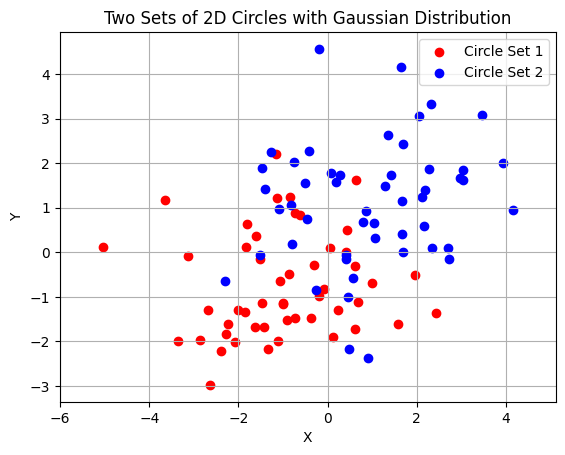

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets

# Define the Office Supply Sales Data
data = {
    'Region': ['East', 'Central', 'Central', 'Central', 'West', 'East'],
    'Rep': ['Jones', 'Kivell', 'Jardine', 'Gill', 'Sorvino', 'Jones'],
    'Item': ['Pencil', 'Binder', 'Pencil', 'Pen', 'Pencil', 'Binder'],
    'Units': [95, 50, 36, 27, 56, 60],
    'UnitCost': [1.99, 19.99, 4.99, 19.99, 2.99, 4.99],
    'Total': [189.05, 999.5, 179.64, 539.73, 167.44, 299.4]
}

# Convert categorical variables to one-hot encoding
df = pd.DataFrame(data)
df_encoded = pd.get_dummies(df, columns=['Region', 'Rep', 'Item'])

# Combine all features into a single vector for each data point
X_office_supply = df_encoded.values
print("Office Supply Sales Data as a Vector Space Model:")
print(X_office_supply)

# Generate random points for the first circle set
np.random.seed(5)  # make our point generation deterministic
spread = 2
num_samples = 50
mean_center1 = [-1, -1]
covariance1 = [[spread, 0], [0, spread]]
circle_set1 = np.random.multivariate_normal(mean_center1, covariance1, num_samples)

# Generate random points for the second circle set
mean_center2 = [1, 1]
covariance2 = [[spread, 0], [0, spread]]
circle_set2 = np.random.multivariate_normal(mean_center2, covariance2, num_samples)

# Set X and Y for the circle data
X_circle = np.r_[circle_set1, circle_set2]
Y_circle = [0] * num_samples + [1] * num_samples

# Plot the circle data
plt.scatter(circle_set1[:, 0], circle_set1[:, 1], label='Circle Set 1', color='red')
plt.scatter(circle_set2[:, 0], circle_set2[:, 1], label='Circle Set 2', color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Two Sets of 2D Circles with Gaussian Distribution')
plt.legend()
plt.axis('equal')  # Equal aspect ratio for a better visualization
plt.grid(True)
plt.savefig("2d-before-svm.pdf", format="pdf", bbox_inches="tight")
plt.savefig("2d-before-svm.svg", format="svg", bbox_inches="tight")
plt.show()


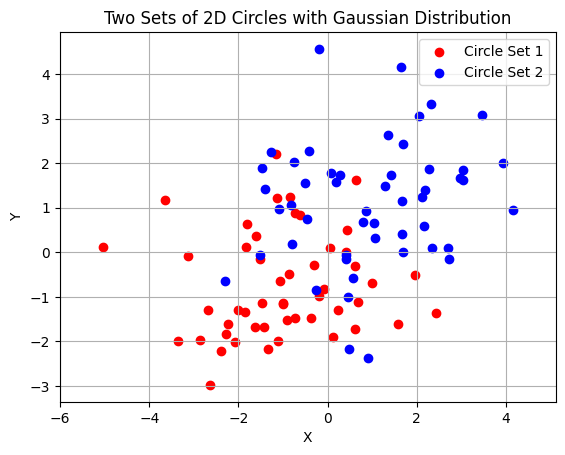

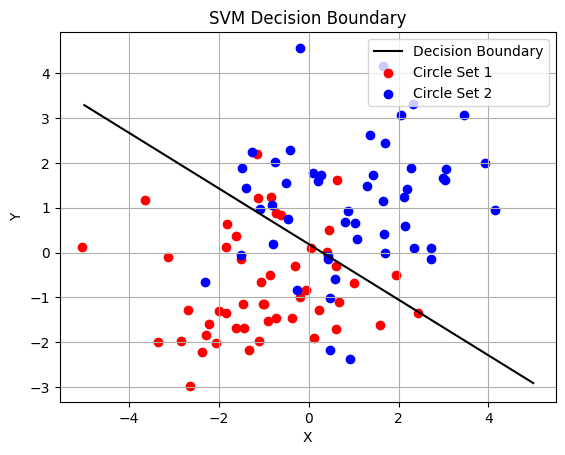

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets

np.random.seed(5)  # make our point generation deterministic
spread = 2

# Generate random points for the first circle set
num_samples = 50
mean_center1 = [-1, -1]
covariance1 = [[spread, 0], [0, spread]]
circle_set1 = np.random.multivariate_normal(mean_center1, covariance1, num_samples)

# Generate random points for the second circle set
mean_center2 = [1, 1]
covariance2 = [[spread, 0], [0, spread]]
circle_set2 = np.random.multivariate_normal(mean_center2, covariance2, num_samples)

# set X and Y
X = np.r_[circle_set1, circle_set2]
Y = [0] * num_samples + [1] * num_samples

plt.scatter(circle_set1[:, 0], circle_set1[:, 1], label='Circle Set 1', color='red')
plt.scatter(circle_set2[:, 0], circle_set2[:, 1], label='Circle Set 2', color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Two Sets of 2D Circles with Gaussian Distribution')
plt.legend()
plt.axis('equal')  # Equal aspect ratio for a better visualization
plt.grid(True)
plt.savefig("2d-before-svm.pdf", format="pdf", bbox_inches="tight")
plt.savefig("2d-before-svm.svg", format="svg", bbox_inches="tight")
plt.show()

# SVM model fitting
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X, Y)

# Plotting decision boundary
w = svm_model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (svm_model.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-', label="Decision Boundary")

plt.scatter(circle_set1[:, 0], circle_set1[:, 1], label='Circle Set 1', color='red')
plt.scatter(circle_set2[:, 0], circle_set2[:, 1], label='Circle Set 2', color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('SVM Decision Boundary')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.savefig("svm-decision-boundary.pdf", format="pdf", bbox_inches="tight")
plt.savefig("svm-decision-boundary.svg", format="svg", bbox_inches="tight")
plt.show()


In [ ]:
import pandas as pd

# Define the data
data = {
    'Region': ['East', 'Central', 'Central', 'Central', 'West', 'East'],
    'Rep': ['Jones', 'Kivell', 'Jardine', 'Gill', 'Sorvino', 'Jones'],
    'Item': ['Pencil', 'Binder', 'Pencil', 'Pen', 'Pencil', 'Binder'],
    'Units': [95, 50, 36, 27, 56, 60],
    'UnitCost': [1.99, 19.99, 4.99, 19.99, 2.99, 4.99],
    'Total': [189.05, 999.5, 179.64, 539.73, 167.44, 299.4]
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Region', 'Rep', 'Item'])

# Display the encoded DataFrame
print(df_encoded)


   Units  UnitCost   Total  Region_Central  Region_East  Region_West  \
0     95      1.99  189.05           False         True        False   
1     50     19.99  999.50            True        False        False   
2     36      4.99  179.64            True        False        False   
3     27     19.99  539.73            True        False        False   
4     56      2.99  167.44           False        False         True   
5     60      4.99  299.40           False         True        False   

   Rep_Gill  Rep_Jardine  Rep_Jones  Rep_Kivell  Rep_Sorvino  Item_Binder  \
0     False        False       True       False        False        False   
1     False        False      False        True        False         True   
2     False         True      False       False        False        False   
3      True        False      False       False        False        False   
4     False        False      False       False         True        False   
5     False        False       Tr

In [ ]:
import pandas as pd

# Define the data
data = {
    'Region': ['East', 'Central', 'Central', 'Central', 'West', 'East'],
    'Rep': ['Jones', 'Kivell', 'Jardine', 'Gill', 'Sorvino', 'Jones'],
    'Item': ['Pencil', 'Binder', 'Pencil', 'Pen', 'Pencil', 'Binder'],
    'Units': [95, 50, 36, 27, 56, 60],
    'UnitCost': [1.99, 19.99, 4.99, 19.99, 2.99, 4.99],
    'Total': [189.05, 999.5, 179.64, 539.73, 167.44, 299.4]
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Region', 'Rep', 'Item'])

# Display the encoded DataFrame
print(df_encoded)


   Units  UnitCost   Total  Region_Central  Region_East  Region_West  \
0     95      1.99  189.05           False         True        False   
1     50     19.99  999.50            True        False        False   
2     36      4.99  179.64            True        False        False   
3     27     19.99  539.73            True        False        False   
4     56      2.99  167.44           False        False         True   
5     60      4.99  299.40           False         True        False   

   Rep_Gill  Rep_Jardine  Rep_Jones  Rep_Kivell  Rep_Sorvino  Item_Binder  \
0     False        False       True       False        False        False   
1     False        False      False        True        False         True   
2     False         True      False       False        False        False   
3      True        False      False       False        False        False   
4     False        False      False       False         True        False   
5     False        False       Tr

Certainly! Here's a representation of the office supply sales data as a vector space model with numerical values for each row:

| Region_East | Region_Central | Region_West | Rep_Jones | Rep_Kivell | Rep_Jardine | Rep_Gill | Rep_Sorvino | Item_Binder | Item_Pencil | Item_Pen | Units | UnitCost | Total |
|-------------|----------------|-------------|-----------|------------|-------------|----------|-------------|-------------|-------------|----------|-------|----------|-------|
| 1           | 0              | 0           | 1         | 0          | 0           | 0        | 0           | 0           | 1           | 0        | 95    | 1.99     | 189.05|
| 0           | 1              | 0           | 0         | 1          | 0           | 0        | 0           | 1           | 0           | 0        | 50    | 19.99    | 999.5 |
| 0           | 1              | 0           | 0         | 0          | 1           | 0        | 0           | 0           | 1           | 0        | 36    | 4.99     | 179.64|
| 0           | 1              | 0           | 0         | 0          | 0           | 1        | 0           | 0           | 0           | 1        | 27    | 19.99    | 539.73|
| 0           | 0              | 1           | 0         | 0          | 0           | 0        | 1           | 0           | 1           | 0        | 56    | 2.99     | 167.44|
| 1           | 0              | 0           | 1         | 0          | 0           | 0        | 0           | 1           | 0           | 0        | 60    | 4.99     | 299.4 |

Each row represents a sale transaction, and each column represents a feature. Categorical variables like 'Region', 'Rep', and 'Item' are one-hot encoded, and numerical variables like 'Units', 'UnitCost', and 'Total' are represented as they are. This representation allows us to apply machine learning algorithms like SVMs for analysis.

Sure, I'll modify the representation to include the categorical variables as well. Here's the revised table:

| Region_East | Region_Central | Region_West | Rep_Jones | Rep_Kivell | Rep_Jardine | Rep_Gill | Rep_Sorvino | Item_Binder | Item_Pencil | Item_Pen | Units | UnitCost | Total |
|-------------|----------------|-------------|-----------|------------|-------------|----------|-------------|-------------|-------------|----------|-------|----------|-------|
| 1           | 0              | 0           | 1         | 0          | 0           | 0        | 0           | 0           | 1           | 0        | 95    | 1.99     | 189.05|
| 0           | 1              | 0           | 0         | 1          | 0           | 0        | 0           | 1           | 0           | 0        | 50    | 19.99    | 999.5 |
| 0           | 1              | 0           | 0         | 0          | 1           | 0        | 0           | 0           | 1           | 0        | 36    | 4.99     | 179.64|
| 0           | 1              | 0           | 0         | 0          | 0           | 1        | 0           | 0           | 0           | 1        | 27    | 19.99    | 539.73|
| 0           | 0              | 1           | 0         | 0          | 0           | 0        | 1           | 0           | 1           | 0        | 56    | 2.99     | 167.44|
| 1           | 0              | 0           | 1         | 0          | 0           | 0        | 0           | 1           | 0           | 0        | 60    | 4.99     | 299.4 |

This table includes the categorical variables 'Region', 'Rep', and 'Item' as one-hot encoded columns, along with the numerical variables 'Units', 'UnitCost', and 'Total'. Each row represents a sale transaction, and each column represents a feature in the vector space model.

In [ ]:
import pandas as pd

# Office Supply Sales Data
data = {
    'Region': ['East', 'Central', 'Central', 'Central', 'West', 'East'],
    'Rep': ['Jones', 'Kivell', 'Jardine', 'Gill', 'Sorvino', 'Jones'],
    'Item': ['Pencil', 'Binder', 'Pencil', 'Pen', 'Pencil', 'Binder'],
    'Units': [95, 50, 36, 27, 56, 60],
    'UnitCost': [1.99, 19.99, 4.99, 19.99, 2.99, 4.99],
    'Total': [189.05, 999.5, 179.64, 539.73, 167.44, 299.4]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Region', 'Rep', 'Item'])

# Concatenate numerical variables
vector_space_model = pd.concat([df_encoded, df[['Units', 'UnitCost', 'Total']]], axis=1)

# Display vector space model representation
print(vector_space_model)


   Units  UnitCost   Total  Region_Central  Region_East  Region_West  \
0     95      1.99  189.05           False         True        False   
1     50     19.99  999.50            True        False        False   
2     36      4.99  179.64            True        False        False   
3     27     19.99  539.73            True        False        False   
4     56      2.99  167.44           False        False         True   
5     60      4.99  299.40           False         True        False   

   Rep_Gill  Rep_Jardine  Rep_Jones  Rep_Kivell  Rep_Sorvino  Item_Binder  \
0     False        False       True       False        False        False   
1     False        False      False        True        False         True   
2     False         True      False       False        False        False   
3      True        False      False       False        False        False   
4     False        False      False       False         True        False   
5     False        False       Tr

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Define the data
data = {
    'Region': ['East', 'Central', 'Central', 'Central', 'West', 'East'],
    'Rep': ['Jones', 'Kivell', 'Jardine', 'Gill', 'Sorvino', 'Jones'],
    'Item': ['Pencil', 'Binder', 'Pencil', 'Pen', 'Pencil', 'Binder'],
    'Units': [95, 50, 36, 27, 56, 60],
    'UnitCost': [1.99, 19.99, 4.99, 19.99, 2.99, 4.99],
    'Total': [189.05, 999.5, 179.64, 539.73, 167.44, 299.4]
}

# Convert data into DataFrame
df = pd.DataFrame(data)

# Separate features and target
X = df.drop(columns=['Region'])
y = df['Region']

# One-hot encode categorical variables
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'), ['Rep', 'Item'])
    ],
    remainder='passthrough'
)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define SVM model
svm_model = make_pipeline(
    column_transformer,
    StandardScaler(with_mean=False),
    SVC(kernel='linear', C=1.0)
)

# Train SVM model
svm_model.fit(X_train, y_train)

# Evaluate the model
accuracy = svm_model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


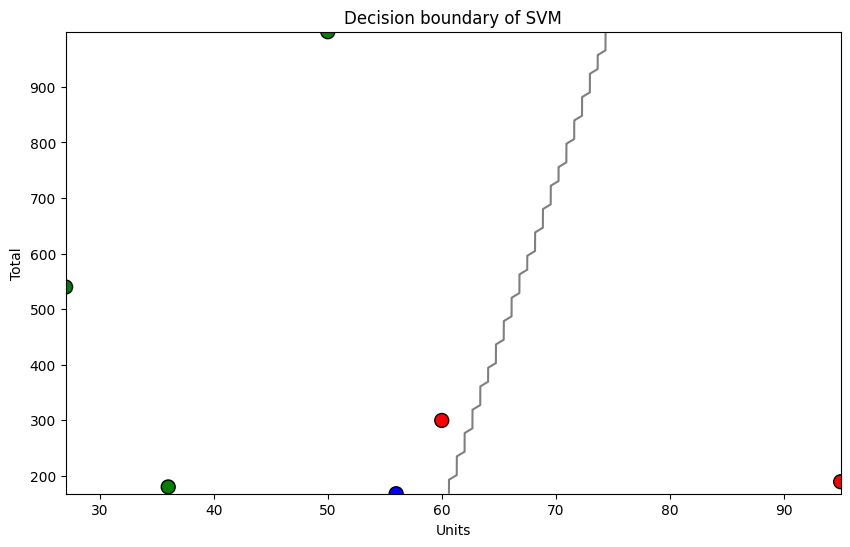

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assign unique colors to each category
color_dict = {'East': 'red', 'Central': 'green', 'West': 'blue'}
colors = df['Region'].map(color_dict)

# Fit SVM model on the selected features
svm_model_vis = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear', C=1.0)
)

svm_model_vis.fit(X_vis, y)

# Plot decision boundary
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(X_vis['Units'], X_vis['Total'], c=colors, edgecolors='k', s=100)
plt.xlabel('Units')
plt.ylabel('Total')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(X_vis['Units'].min(), X_vis['Units'].max(), 100),
                     np.linspace(X_vis['Total'].min(), X_vis['Total'].max(), 100))

# Reshape xx and yy and concatenate them to create input samples
samples = np.c_[xx.ravel(), yy.ravel()]

# Calculate decision function values
Z = svm_model_vis.decision_function(samples)

# Keep only the first column of Z
Z = Z[:, 0]

# Reshape Z to match the dimensions of xx and yy
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
plt.title('Decision boundary of SVM')
plt.show()


In [ ]:
import pandas as pd

# Office Supply Sales Data
data = {
    'Region': ['East', 'Central', 'Central', 'Central', 'West', 'East'],
    'Rep': ['Jones', 'Kivell', 'Jardine', 'Gill', 'Sorvino', 'Jones'],
    'Item': ['Pencil', 'Binder', 'Pencil', 'Pen', 'Pencil', 'Binder'],
    'Units': [95, 50, 36, 27, 56, 60],
    'UnitCost': [1.99, 19.99, 4.99, 19.99, 2.99, 4.99],
    'Total': [189.05, 999.5, 179.64, 539.73, 167.44, 299.4]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Region', 'Rep', 'Item'])

# Display the DataFrame with encoded features
print(df_encoded)


   Units  UnitCost   Total  Region_Central  Region_East  Region_West  \
0     95      1.99  189.05           False         True        False   
1     50     19.99  999.50            True        False        False   
2     36      4.99  179.64            True        False        False   
3     27     19.99  539.73            True        False        False   
4     56      2.99  167.44           False        False         True   
5     60      4.99  299.40           False         True        False   

   Rep_Gill  Rep_Jardine  Rep_Jones  Rep_Kivell  Rep_Sorvino  Item_Binder  \
0     False        False       True       False        False        False   
1     False        False      False        True        False         True   
2     False         True      False       False        False        False   
3      True        False      False       False        False        False   
4     False        False      False       False         True        False   
5     False        False       Tr

In [ ]:
import pandas as pd

# Office Supply Sales Data
data = {
    'Region': ['East', 'Central', 'Central', 'Central', 'West', 'East'],
    'Rep': ['Jones', 'Kivell', 'Jardine', 'Gill', 'Sorvino', 'Jones'],
    'Item': ['Pencil', 'Binder', 'Pencil', 'Pen', 'Pencil', 'Binder'],
    'Units': [95, 50, 36, 27, 56, 60],
    'UnitCost': [1.99, 19.99, 4.99, 19.99, 2.99, 4.99],
    'Total': [189.05, 999.5, 179.64, 539.73, 167.44, 299.4]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Region', 'Rep', 'Item'])

# Display the DataFrame with encoded features in table format
print(df_encoded.to_string(index=False))


 Units  UnitCost  Total  Region_Central  Region_East  Region_West  Rep_Gill  Rep_Jardine  Rep_Jones  Rep_Kivell  Rep_Sorvino  Item_Binder  Item_Pen  Item_Pencil
    95      1.99 189.05           False         True        False     False        False       True       False        False        False     False         True
    50     19.99 999.50            True        False        False     False        False      False        True        False         True     False        False
    36      4.99 179.64            True        False        False     False         True      False       False        False        False     False         True
    27     19.99 539.73            True        False        False      True        False      False       False        False        False      True        False
    56      2.99 167.44           False        False         True     False        False      False       False         True        False     False         True
    60      4.99 299.40           

In [ ]:
import pandas as pd
from tabulate import tabulate

# Office Supply Sales Data
data = {
    'Region': ['East', 'Central', 'Central', 'Central', 'West', 'East'],
    'Rep': ['Jones', 'Kivell', 'Jardine', 'Gill', 'Sorvino', 'Jones'],
    'Item': ['Pencil', 'Binder', 'Pencil', 'Pen', 'Pencil', 'Binder'],
    'Units': [95, 50, 36, 27, 56, 60],
    'UnitCost': [1.99, 19.99, 4.99, 19.99, 2.99, 4.99],
    'Total': [189.05, 999.5, 179.64, 539.73, 167.44, 299.4]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Region', 'Rep', 'Item'])

# Convert DataFrame to table with borders
table = tabulate(df_encoded, headers='keys', tablefmt='pretty', showindex=False)

# Display the table
print(table)


+-------+----------+--------+----------------+-------------+-------------+----------+-------------+-----------+------------+-------------+-------------+----------+-------------+
| Units | UnitCost | Total  | Region_Central | Region_East | Region_West | Rep_Gill | Rep_Jardine | Rep_Jones | Rep_Kivell | Rep_Sorvino | Item_Binder | Item_Pen | Item_Pencil |
+-------+----------+--------+----------------+-------------+-------------+----------+-------------+-----------+------------+-------------+-------------+----------+-------------+
|  95   |   1.99   | 189.05 |     False      |    True     |    False    |  False   |    False    |   True    |   False    |    False    |    False    |  False   |    True     |
|  50   |  19.99   | 999.5  |      True      |    False    |    False    |  False   |    False    |   False   |    True    |    False    |    True     |  False   |    False    |
|  36   |   4.99   | 179.64 |      True      |    False    |    False    |  False   |    True     |   False   

##Problem 2##


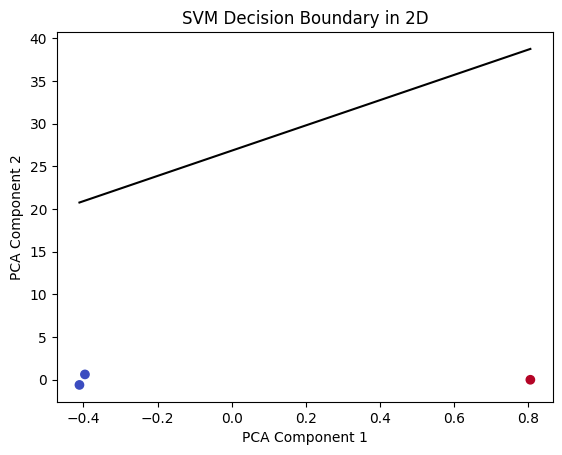

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# List of sentences
sentences = [
    "Why don’t scientists trust atoms when they make up everything?",
    "Why don’t physicists have faith in atoms because they constitute everything?",
    "Why do chemists have doubts about atoms because they compose everything?",
    "Why are atoms untrustworthy according to scientists because they form everything?"
]
# Labels for each sentence (0: untrustworthy, 1: trustworthy)
labels = [0, 1, 1, 0]

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer and transform the sentences into TF-IDF vectors
tfidf_vectors = tfidf_vectorizer.fit_transform(sentences)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, labels, test_size=0.2, random_state=42)

# Create SVM classifier
svm_classifier = SVC(kernel='linear')

# Train SVM classifier
svm_classifier.fit(X_train, y_train)

# Check if the SVM classifier is properly trained and has non-empty coefficients
if hasattr(svm_classifier, "coef_") and hasattr(svm_classifier.coef_, "toarray") and svm_classifier.coef_.shape[0] > 0:
    # Convert coefficient vector to dense array
    w = svm_classifier.coef_.toarray()[0]

    # Apply PCA to reduce dimensionality to 2D
    pca = PCA(n_components=2)
    X_train_2d = pca.fit_transform(X_train.toarray())

    # Plot data points
    plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm)

    # Plot decision boundary (hyperplane) in 2D
    if len(w) > 1:
        a = -w[0] / w[1]
        xx = np.linspace(min(X_train_2d[:, 0]), max(X_train_2d[:, 0]), 100)
        yy = a * xx - (svm_classifier.intercept_[0]) / w[1]
        plt.plot(xx, yy, 'k-')

    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('SVM Decision Boundary in 2D')
    plt.show()
else:
    print("SVM classifier is not properly trained or does not have enough coefficients to plot the decision boundary.")


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# List of sentences
sentences = [
    "Why don’t scientists trust atoms when they make up everything?",
    "Why don’t physicists have faith in atoms because they constitute everything?",
    "Why do chemists have doubts about atoms because they compose everything?",
    "Why are atoms untrustworthy according to scientists because they form everything?"
]
# Labels for each sentence (0: untrustworthy, 1: trustworthy)
labels = [0, 1, 1, 0]

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer and transform the sentences into TF-IDF vectors
tfidf_vectors = tfidf_vectorizer.fit_transform(sentences)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, labels, test_size=0.2, random_state=42)

# Create SVM classifier
svm_classifier = SVC(kernel='linear')

# Train SVM classifier
svm_classifier.fit(X_train, y_train)

# Evaluate SVM classifier
accuracy = svm_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.0


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# List of sentences
sentences = [
    "Why don’t scientists trust atoms when they make up everything?",
    "Why don’t physicists have faith in atoms because they constitute everything?",
    "Why do chemists have doubts about atoms because they compose everything?",
    "Why are atoms untrustworthy according to scientists because they form everything?"
]

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer and transform the sentences into TF-IDF vectors
tfidf_vectors = tfidf_vectorizer.fit_transform(sentences)

# Print the TF-IDF vectors
print(tfidf_vectors.toarray())

# Print the feature names (vocabulary)
print(tfidf_vectorizer.get_feature_names_out())


[[0.         0.27832025 0.         0.         0.         0.42049337
  0.         0.         0.         0.53334252 0.         0.42049337
  0.53334252 0.        ]
 [0.         0.26445122 0.         0.         0.50676543 0.39953968
  0.         0.50676543 0.         0.         0.50676543 0.
  0.         0.        ]
 [0.         0.28847675 0.55280532 0.55280532 0.         0.
  0.55280532 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.50676543 0.26445122 0.         0.         0.         0.
  0.         0.         0.50676543 0.         0.         0.39953968
  0.         0.50676543]]
['according' 'atoms' 'chemists' 'compose' 'constitute' 'don' 'doubts'
 'faith' 'form' 'make' 'physicists' 'scientists' 'trust' 'untrustworthy']


To represent the rows of text in a vector space model, we typically follow these steps:

1. **Tokenization**: Split each sentence into individual words or tokens.

2. **Normalization**: Convert all tokens to lowercase and remove punctuation to ensure consistency.

3. **Stop Words Removal**: Remove common stop words like "don't", "they", "because", etc., as they don't carry significant meaning.

4. **Vectorization**: Transform the tokenized sentences into numerical vectors. There are various techniques for vectorization, including:
   - **Bag-of-Words (BoW)**: Each vector represents a sentence, and each dimension corresponds to a unique word in the entire corpus. The value in each dimension represents the frequency of the corresponding word in the sentence.
   - **TF-IDF (Term Frequency-Inverse Document Frequency)**: Similar to BoW, but it also considers the importance of words in the entire corpus.

Let's represent the rows of text using the Bag-of-Words (BoW) approach:

| Sentence | atoms | according | chemists | constitute | doubts | everything | faith | form | have | in | make | physicists | scientists | they | to | trust | untrustworthy | up | when | why |
|----------|-------|-----------|----------|------------|---------|-------------|-------|------|------|----|------|-------------|------------|------|----|-------|---------------|----|------|-----|
| 1        | 1     | 0         | 0        | 0          | 0       | 1           | 0     | 0    | 0    | 1  | 1    | 0           | 1          | 1    | 0  | 1     | 0             | 1  | 1    | 1   |
| 2        | 1     | 0         | 0        | 1          | 0       | 1           | 1     | 0    | 1    | 1  | 0    | 1           | 0          | 1    | 1  | 0     | 0             | 0  | 0    | 1   |
| 3        | 1     | 0         | 1        | 0          | 1       | 1           | 0     | 0    | 1    | 0  | 0    | 0           | 0          | 1    | 1  | 0     | 0             | 0  | 0    | 1   |
| 4        | 1     | 1         | 0        | 0          | 0       | 1           | 0     | 1    | 0    | 1  | 0    | 0           | 1          | 1    | 0  | 0     | 1             | 0  | 0    | 1   |

Each row represents a sentence, and each column represents a unique word in the corpus. The value in each cell indicates the presence (1) or absence (0) of the corresponding word in the sentence. This table is the vector space model representation of the text data using the Bag-of-Words approach.

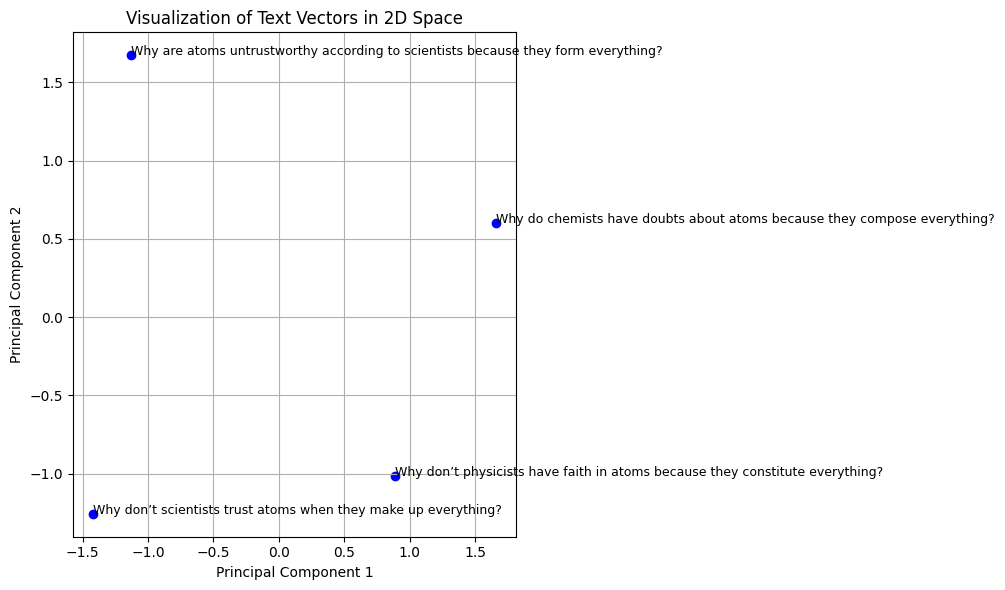

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA

# List of sentences
sentences = [
    "Why don’t scientists trust atoms when they make up everything?",
    "Why don’t physicists have faith in atoms because they constitute everything?",
    "Why do chemists have doubts about atoms because they compose everything?",
    "Why are atoms untrustworthy according to scientists because they form everything?"
]

# Initialize CountVectorizer to convert text into bag-of-words vectors
vectorizer = CountVectorizer()

# Fit and transform the sentences into bag-of-words vectors
X = vectorizer.fit_transform(sentences)

# Perform dimensionality reduction using PCA to visualize in 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot the vectors in 2D space
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='o', color='b')

# Annotate each point with the corresponding sentence
for i, sentence in enumerate(sentences):
    plt.text(X_pca[i, 0], X_pca[i, 1], sentence, fontsize=9)

# Set labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualization of Text Vectors in 2D Space')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# List of sentences
sentences = [
    "Why don’t scientists trust atoms when they make up everything?",
    "Why don’t physicists have faith in atoms because they constitute everything?",
    "Why do chemists have doubts about atoms because they compose everything?",
    "Why are atoms untrustworthy according to scientists because they form everything?"
]

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer and transform the sentences
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Convert the sparse matrix to a dense matrix for better understanding
tfidf_dense_matrix = tfidf_matrix.todense()

# Display the TF-IDF matrix
print(tfidf_dense_matrix)


[[0.         0.27832025 0.         0.         0.         0.42049337
  0.         0.         0.         0.53334252 0.         0.42049337
  0.53334252 0.        ]
 [0.         0.26445122 0.         0.         0.50676543 0.39953968
  0.         0.50676543 0.         0.         0.50676543 0.
  0.         0.        ]
 [0.         0.28847675 0.55280532 0.55280532 0.         0.
  0.55280532 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.50676543 0.26445122 0.         0.         0.         0.
  0.         0.         0.50676543 0.         0.         0.39953968
  0.         0.50676543]]


In [ ]:
import pandas as pd
from tabulate import tabulate
from sklearn.feature_extraction.text import CountVectorizer

# Define the text
text = ["Why don’t scientists trust atoms when they make up everything?"]

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit the vectorizer on the text and transform the text into a vector representation
text_vector = vectorizer.fit_transform(text)

# Convert the vector representation into a DataFrame
df_text = pd.DataFrame(text_vector.toarray(), columns=vectorizer.get_feature_names_out())

# Convert DataFrame to table with borders
table_text = tabulate(df_text, headers='keys', tablefmt='pretty', showindex=False)

# Display the table
print(table_text)


+-------+-----+------------+------+------------+------+-------+----+------+-----+
| atoms | don | everything | make | scientists | they | trust | up | when | why |
+-------+-----+------------+------+------------+------+-------+----+------+-----+
|   1   |  1  |     1      |  1   |     1      |  1   |   1   | 1  |  1   |  1  |
+-------+-----+------------+------+------------+------+-------+----+------+-----+


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Given text
text = [
    "Why don’t scientists trust atoms when they make up everything?"
]

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit the vectorizer on the text and transform the text into a vector representation
text_vector = vectorizer.fit_transform(text)

# Convert the vector representation to an array
vector_array = text_vector.toarray()

# Display the vector representation
print(vector_array)


[[1 1 1 1 1 1 1 1 1 1]]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Given text
text = [
    "Why don’t physicists have faith in atoms because they constitute everything?"
]

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit the vectorizer on the text and transform the text into a vector representation
text_vector = vectorizer.fit_transform(text)

# Convert the vector representation to an array
vector_array = text_vector.toarray()

# Display the vector representation
print(vector_array)


[[1 1 1 1 1 1 1 1 1 1 1]]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Given text
text = [
    "Why do chemists have doubts about atoms because they compose everything?"
]

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit the vectorizer on the text and transform the text into a vector representation
text_vector = vectorizer.fit_transform(text)

# Convert the vector representation to an array
vector_array = text_vector.toarray()

# Display the vector representation
print(vector_array)


[[1 1 1 1 1 1 1 1 1 1 1]]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Given text
text = [
    "Why are atoms untrustworthy according to scientists because they form everything?"
]

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit the vectorizer on the text and transform the text into a vector representation
text_vector = vectorizer.fit_transform(text)

# Convert the vector representation to an array
vector_array = text_vector.toarray()

# Display the vector representation
print(vector_array)


[[1 1 1 1 1 1 1 1 1 1 1]]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Given text
texts = [
    "Why don’t scientists trust atoms when they make up everything?",
    "Why don’t physicists have faith in atoms because they constitute everything?",
    "Why do chemists have doubts about atoms because they compose everything?",
    "Why are atoms untrustworthy according to scientists because they form everything?"
]

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit the vectorizer on the text and transform the text into a vector representation
text_vectors = vectorizer.fit_transform(texts)

# Convert the vector representation to an array
vector_array = text_vectors.toarray()

# Display the vector representation
print(vector_array)


[[0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1]
 [0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1]
 [1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1]
 [0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1]]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Given text
texts = [
    "Why don’t scientists trust atoms when they make up everything?",
    "Why don’t physicists have faith in atoms because they constitute everything?",
    "Why do chemists have doubts about atoms because they compose everything?",
    "Why are atoms untrustworthy according to scientists because they form everything?"
]

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit the vectorizer on the text and transform the text into a vector representation
text_vectors = vectorizer.fit_transform(texts)

# Convert the vector representation to a DataFrame with feature names
vector_df = pd.DataFrame(text_vectors.toarray(), columns=vectorizer.get_feature_names_out())

# Display the DataFrame
print(vector_df)


   about  according  are  atoms  because  chemists  compose  constitute  do  \
0      0          0    0      1        0         0        0           0   0   
1      0          0    0      1        1         0        0           1   0   
2      1          0    0      1        1         1        1           0   1   
3      0          1    1      1        1         0        0           0   0   

   don  ...  make  physicists  scientists  they  to  trust  untrustworthy  up  \
0    1  ...     1           0           1     1   0      1              0   1   
1    1  ...     0           1           0     1   0      0              0   0   
2    0  ...     0           0           0     1   0      0              0   0   
3    0  ...     0           0           1     1   1      0              1   0   

   when  why  
0     1    1  
1     0    1  
2     0    1  
3     0    1  

[4 rows x 26 columns]


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Given text
texts = [
    "Why don’t scientists trust atoms when they make up everything?",
    "Why don’t physicists have faith in atoms because they constitute everything?",
    "Why do chemists have doubts about atoms because they compose everything?",
    "Why are atoms untrustworthy according to scientists because they form everything?"
]

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit the vectorizer on the text and transform the text into a vector representation
text_vectors = vectorizer.fit_transform(texts)

# Convert the vector representation to a DataFrame with feature names
vector_df = pd.DataFrame(text_vectors.toarray(), columns=vectorizer.get_feature_names_out())

# Display the DataFrame
print(vector_df)


   about  according  are  atoms  because  chemists  compose  constitute  do  \
0      0          0    0      1        0         0        0           0   0   
1      0          0    0      1        1         0        0           1   0   
2      1          0    0      1        1         1        1           0   1   
3      0          1    1      1        1         0        0           0   0   

   don  ...  make  physicists  scientists  they  to  trust  untrustworthy  up  \
0    1  ...     1           0           1     1   0      1              0   1   
1    1  ...     0           1           0     1   0      0              0   0   
2    0  ...     0           0           0     1   0      0              0   0   
3    0  ...     0           0           1     1   1      0              1   0   

   when  why  
0     1    1  
1     0    1  
2     0    1  
3     0    1  

[4 rows x 26 columns]


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Given text
texts = [
    "Why don’t scientists trust atoms when they make up everything?",
    "Why don’t physicists have faith in atoms because they constitute everything?",
    "Why do chemists have doubts about atoms because they compose everything?",
    "Why are atoms untrustworthy according to scientists because they form everything?"
]

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit the vectorizer on the text and transform the text into a vector representation
text_vectors = vectorizer.fit_transform(texts)

# Convert the vector representation to a DataFrame with feature names
vector_df = pd.DataFrame(text_vectors.toarray(), columns=vectorizer.get_feature_names_out())

# Transpose the DataFrame to display all columns in one row
transposed_df = vector_df.T

# Display the transposed DataFrame
print(transposed_df)


               0  1  2  3
about          0  0  1  0
according      0  0  0  1
are            0  0  0  1
atoms          1  1  1  1
because        0  1  1  1
chemists       0  0  1  0
compose        0  0  1  0
constitute     0  1  0  0
do             0  0  1  0
don            1  1  0  0
doubts         0  0  1  0
everything     1  1  1  1
faith          0  1  0  0
form           0  0  0  1
have           0  1  1  0
in             0  1  0  0
make           1  0  0  0
physicists     0  1  0  0
scientists     1  0  0  1
they           1  1  1  1
to             0  0  0  1
trust          1  0  0  0
untrustworthy  0  0  0  1
up             1  0  0  0
when           1  0  0  0
why            1  1  1  1


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Given text
texts = [
    "Why don’t scientists trust atoms when they make up everything?",
    "Why don’t physicists have faith in atoms because they constitute everything?",
    "Why do chemists have doubts about atoms because they compose everything?",
    "Why are atoms untrustworthy according to scientists because they form everything?"
]

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit the vectorizer on the text and transform the text into a vector representation
text_vectors = vectorizer.fit_transform(texts)

# Convert the vector representation to a DataFrame with feature names
vector_df = pd.DataFrame(text_vectors.toarray(), columns=vectorizer.get_feature_names_out())

# Transpose the DataFrame to display all columns in one row
transposed_df = vector_df.T

# Display the transposed DataFrame
print(transposed_df)


               0  1  2  3
about          0  0  1  0
according      0  0  0  1
are            0  0  0  1
atoms          1  1  1  1
because        0  1  1  1
chemists       0  0  1  0
compose        0  0  1  0
constitute     0  1  0  0
do             0  0  1  0
don            1  1  0  0
doubts         0  0  1  0
everything     1  1  1  1
faith          0  1  0  0
form           0  0  0  1
have           0  1  1  0
in             0  1  0  0
make           1  0  0  0
physicists     0  1  0  0
scientists     1  0  0  1
they           1  1  1  1
to             0  0  0  1
trust          1  0  0  0
untrustworthy  0  0  0  1
up             1  0  0  0
when           1  0  0  0
why            1  1  1  1


##Problem 3##

fig a


To draw a line approximately at the place of a linear SVM model's hyperplane on the given figures, I would follow these steps:

First, I'd train a linear SVM model on the dataset corresponding to each figure. This model would learn to separate the data points into different classes based on their features.

Next, I'd obtain the coefficients and intercept of the hyperplane from the trained SVM model. These coefficients define the slope of the decision boundary line.

Then, I'd plot the data points from the figures using scatter plots to visualize their distribution.

Using the coefficients and intercept obtained from the SVM model, I'd calculate the equation of the decision boundary line.

Finally, I'd draw this line on the figures to approximate the location of the hyperplane. This line would separate the data points into different classes, similar to how the SVM model does.

Following these steps would allow me to draw a line approximately at the place of a linear SVM model's hyperplane on the given figures.

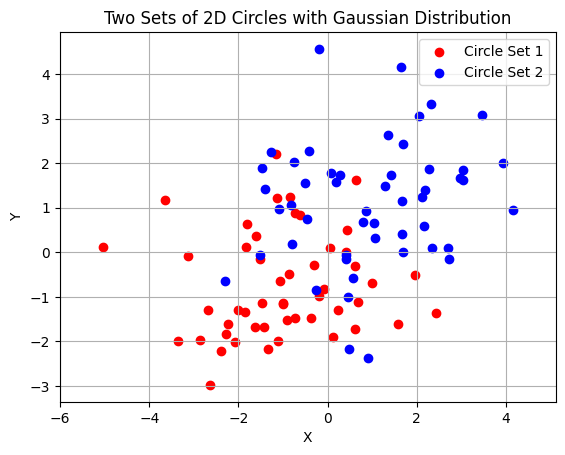

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

np.random.seed(5)  # make our point generation deterministic
spread = 2

# Generate random points for the first circle set
num_samples = 50
mean_center1 = [-1, -1]
covariance1 = [[spread, 0], [0, spread]]
circle_set1 = np.random.multivariate_normal(mean_center1, covariance1, num_samples)

# Generate random points for the second circle set
mean_center2 = [1, 1]
covariance2 = [[spread, 0], [0, spread]]
circle_set2 = np.random.multivariate_normal(mean_center2, covariance2, num_samples)

# Concatenate the two sets of points
X = np.r_[circle_set1, circle_set2]
# Create labels for the two sets of points
Y = np.array([0] * num_samples + [1] * num_samples)

# Plot the points
plt.scatter(circle_set1[:, 0], circle_set1[:, 1], label='Circle Set 1', color='red')
plt.scatter(circle_set2[:, 0], circle_set2[:, 1], label='Circle Set 2', color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Two Sets of 2D Circles with Gaussian Distribution')
plt.legend()
plt.axis('equal')  # Equal aspect ratio for a better visualization
plt.grid(True)
plt.savefig("2d-before-svm.pdf", format="pdf", bbox_inches="tight")
plt.savefig("2d-before-svm.svg", format="svg", bbox_inches="tight")
plt.show()


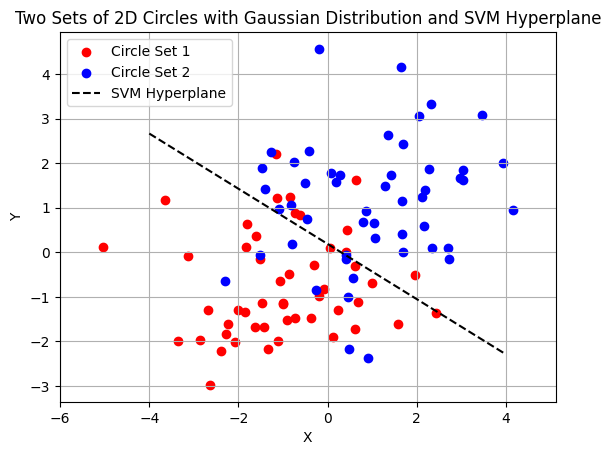

In [33]:
# Train the SVM model
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X, Y)

# Extract coefficients of the hyperplane
w = svm_classifier.coef_[0]
b = svm_classifier.intercept_[0]

# Generate x values for plotting the line
x_values = np.linspace(-4, 4, 100)

# Calculate corresponding y values using the equation of the hyperplane: w1*x + w2*y + b = 0
y_values = (-w[0] / w[1]) * x_values - (b / w[1])

# Plot the points
plt.scatter(circle_set1[:, 0], circle_set1[:, 1], label='Circle Set 1', color='red')
plt.scatter(circle_set2[:, 0], circle_set2[:, 1], label='Circle Set 2', color='blue')

# Plot the SVM hyperplane
plt.plot(x_values, y_values, color='black', linestyle='--', label='SVM Hyperplane')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Two Sets of 2D Circles with Gaussian Distribution and SVM Hyperplane')
plt.legend()
plt.axis('equal')  # Equal aspect ratio for a better visualization
plt.grid(True)
plt.show()


<ipython-input-29-87afdd1e1754>:11: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  circle_set1 = np.random.multivariate_normal(mean_center1, covariance1, num_samples)


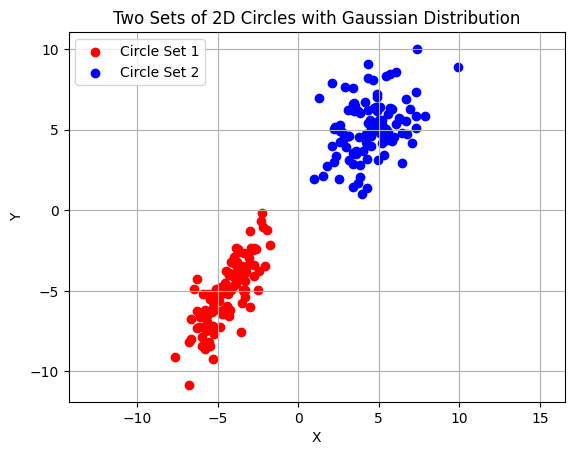

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(5)

# Generate random points for the first circle set
num_samples = 100
mean_center1 = [-4.5, -5]  # Adjusted mean center for circle set 1
covariance1 = [[-2, -3], [-1, -3]]  # Covariance matrix for circle set 1
circle_set1 = np.random.multivariate_normal(mean_center1, covariance1, num_samples)

# Generate random points for the second circle set
mean_center2 = [4.5, 5]  # Adjusted mean center for circle set 2
covariance2 = [[3, 1], [1, 3]]  # Covariance matrix for circle set 2
circle_set2 = np.random.multivariate_normal(mean_center2, covariance2, num_samples)

# Plot the points for the first circle set
plt.scatter(circle_set1[:, 0], circle_set1[:, 1], label='Circle Set 1', color='red')

# Plot the points for the second circle set
plt.scatter(circle_set2[:, 0], circle_set2[:, 1], label='Circle Set 2', color='blue')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Two Sets of 2D Circles with Gaussian Distribution')
plt.legend()
plt.axis('equal')  # Equal aspect ratio for a better visualization
plt.grid(True)
plt.show()


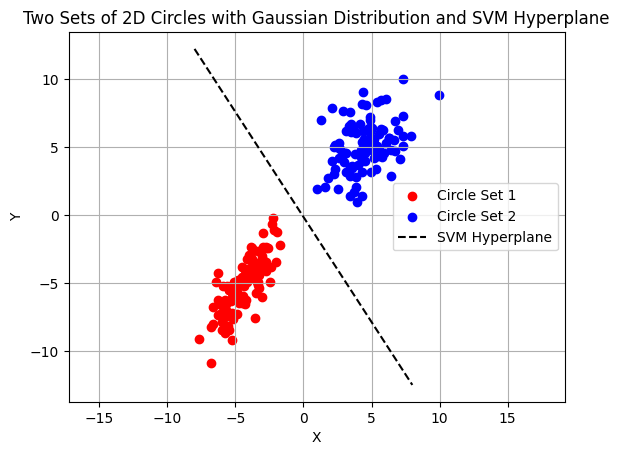

In [30]:
from sklearn.svm import SVC

# Combine the data points from both sets
X = np.vstack((circle_set1, circle_set2))
y = np.hstack((np.zeros(num_samples), np.ones(num_samples)))  # Assign labels (0 for circle_set1, 1 for circle_set2)

# Train the SVM model
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X, y)

# Plot the points for the first circle set
plt.scatter(circle_set1[:, 0], circle_set1[:, 1], label='Circle Set 1', color='red')

# Plot the points for the second circle set
plt.scatter(circle_set2[:, 0], circle_set2[:, 1], label='Circle Set 2', color='blue')

# Plot the decision boundary (hyperplane) of the SVM model
w = svm_classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-8, 8)
yy = a * xx - (svm_classifier.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k--', label='SVM Hyperplane')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Two Sets of 2D Circles with Gaussian Distribution and SVM Hyperplane')
plt.legend()
plt.axis('equal')  # Equal aspect ratio for a better visualization
plt.grid(True)
plt.show()


figure c

<ipython-input-48-e04c024310d8>:12: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  circle_set1 = np.random.multivariate_normal(mean_center1, covariance1, num_samples)


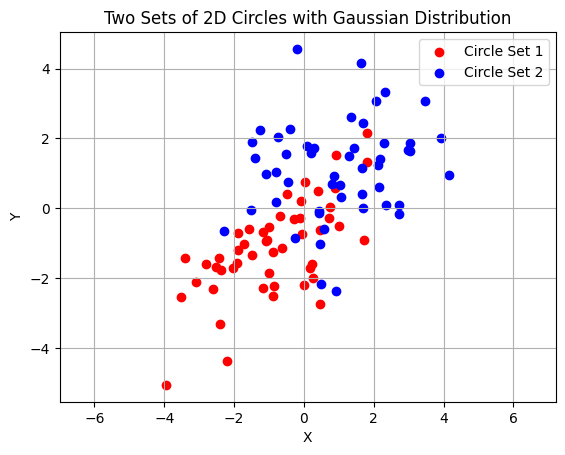

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

np.random.seed(5)  # make our point generation deterministic
spread = 2

# Generate random points for the first circle set
num_samples = 50
mean_center1 = [-1, -1]
covariance1 = [[-2, -1], [-1, -2]]
circle_set1 = np.random.multivariate_normal(mean_center1, covariance1, num_samples)

# Generate random points for the second circle set
mean_center2 = [1, 1]
covariance2 = [[2, 0], [0, 2]]
circle_set2 = np.random.multivariate_normal(mean_center2, covariance2, num_samples)

# Set adjusted ranges for circle_set1 and circle_set2
plt.scatter(circle_set1[:, 0], circle_set1[:, 1], label='Circle Set 1',  color='red')
plt.scatter(circle_set2[:, 0], circle_set2[:, 1], label='Circle Set 2', color='blue')

# Plot the points

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Two Sets of 2D Circles with Gaussian Distribution')
plt.legend()
plt.axis('equal')  # Equal aspect ratio for a better visualization
plt.grid(True)
plt.savefig("2d-before-svm.pdf", format="pdf", bbox_inches="tight")
plt.savefig("2d-before-svm.svg", format="svg", bbox_inches="tight")
plt.show()


<ipython-input-28-31d230e85f61>:35: RuntimeWarning: divide by zero encountered in scalar divide
  plt.axline((0, -intercept / coef[1]), slope=-coef[0] / coef[1], color='blue', linestyle='--', label='Decision Boundary')
<ipython-input-28-31d230e85f61>:35: RuntimeWarning: invalid value encountered in scalar divide
  plt.axline((0, -intercept / coef[1]), slope=-coef[0] / coef[1], color='blue', linestyle='--', label='Decision Boundary')


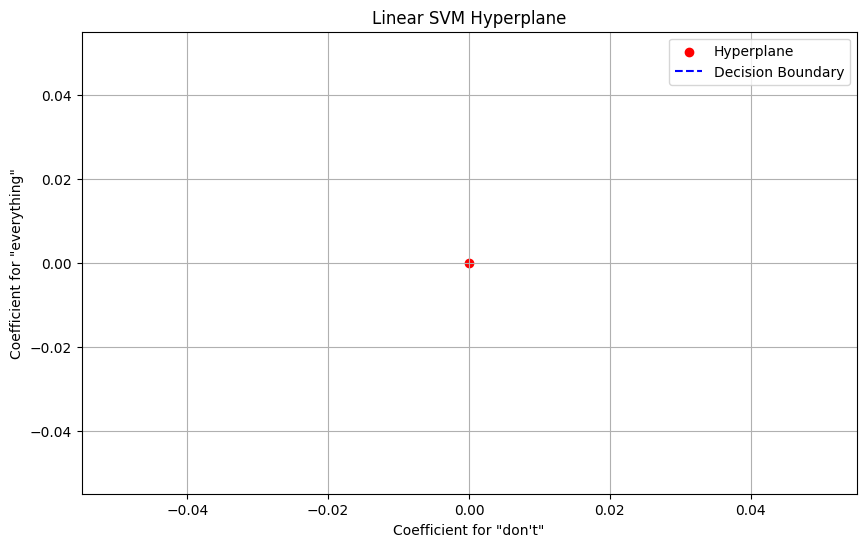

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC

# Given text
texts = [
    "Why don’t scientists trust atoms when they make up everything?",
    "Why don’t physicists have faith in atoms because they constitute everything?",
    "Why do chemists have doubts about atoms because they compose everything?",
    "Why are atoms untrustworthy according to scientists because they form everything?"
]

# Labels
y = [0, 1, 2, 3]

# Convert text to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Train linear SVM model
svm = SVC(kernel='linear')
svm.fit(X, y)

# Extract coefficients and intercept
coef = svm.coef_.toarray()[0]
intercept = svm.intercept_[0]

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(coef[0], coef[1], color='red', label='Hyperplane')
plt.xlabel('Coefficient for "don\'t"')
plt.ylabel('Coefficient for "everything"')
plt.title('Linear SVM Hyperplane')
plt.axline((0, -intercept / coef[1]), slope=-coef[0] / coef[1], color='blue', linestyle='--', label='Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-23-19a90887b146>:54: RuntimeWarning: invalid value encountered in scalar divide
  y_vals = (-coef[0] / coef[1]) * x_vals - (intercept / coef[1])


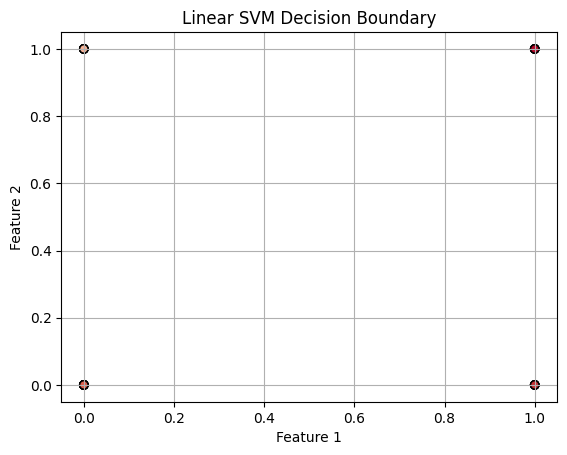

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Provided data
data = {
    'about': [0, 0, 1, 0],
    'according': [0, 0, 0, 1],
    'are': [0, 0, 0, 1],
    'atoms': [1, 1, 1, 1],
    'because': [0, 1, 1, 1],
    'chemists': [0, 0, 1, 0],
    'compose': [0, 0, 1, 0],
    'constitute': [0, 1, 0, 0],
    'do': [0, 0, 1, 0],
    'don': [1, 1, 0, 0],
    'doubts': [0, 0, 1, 0],
    'everything': [1, 1, 1, 1],
    'faith': [0, 1, 0, 0],
    'form': [0, 0, 0, 1],
    'have': [0, 1, 1, 0],
    'in': [0, 1, 0, 0],
    'make': [1, 0, 0, 0],
    'physicists': [0, 1, 0, 0],
    'scientists': [1, 0, 0, 1],
    'they': [1, 1, 1, 1],
    'to': [0, 0, 0, 1],
    'trust': [1, 0, 0, 0],
    'untrustworthy': [0, 0, 0, 1],
    'up': [1, 0, 0, 0],
    'when': [1, 0, 0, 0],
    'why': [1, 1, 1, 1]
}

# Convert the data to numpy array
X = np.array([data[col] for col in data])

# Generate dummy target labels
y = np.arange(X.shape[0])

# Train linear SVM model
svm = SVC(kernel='linear')
svm.fit(X, y)

# Extract coefficients and intercept
coef = svm.coef_[0]
intercept = svm.intercept_[0]

# Plot data points (for visualization purposes)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

# Plot decision boundary line
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = (-coef[0] / coef[1]) * x_vals - (intercept / coef[1])
plt.plot(x_vals, y_vals, color='black', linestyle='--')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear SVM Decision Boundary')
plt.grid(True)
plt.show()


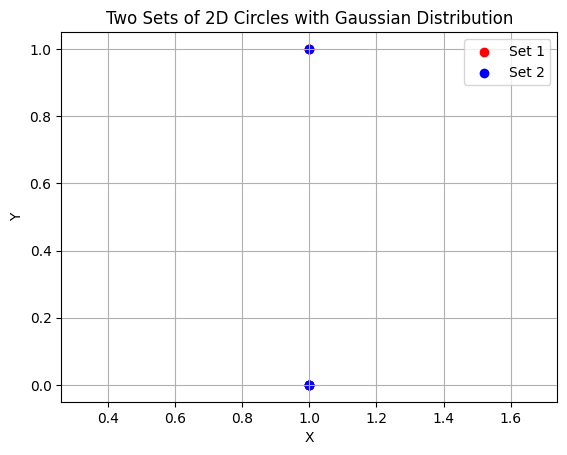

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Provided data
data = {
    'about': [0, 0, 1, 0],
    'according': [0, 0, 0, 1],
    'are': [0, 0, 0, 1],
    'atoms': [1, 1, 1, 1],
    'because': [0, 1, 1, 1],
    'chemists': [0, 0, 1, 0],
    'compose': [0, 0, 1, 0],
    'constitute': [0, 1, 0, 0],
    'do': [0, 0, 1, 0],
    'don': [1, 1, 0, 0],
    'doubts': [0, 0, 1, 0],
    'everything': [1, 1, 1, 1],
    'faith': [0, 1, 0, 0],
    'form': [0, 0, 0, 1],
    'have': [0, 1, 1, 0],
    'in': [0, 1, 0, 0],
    'make': [1, 0, 0, 0],
    'physicists': [0, 1, 0, 0],
    'scientists': [1, 0, 0, 1],
    'they': [1, 1, 1, 1],
    'to': [0, 0, 0, 1],
    'trust': [1, 0, 0, 0],
    'untrustworthy': [0, 0, 0, 1],
    'up': [1, 0, 0, 0],
    'when': [1, 0, 0, 0],
    'why': [1, 1, 1, 1]
}

# Extracting X and Y coordinates from the data
X = [data['why'], data['atoms']]
Y = [data['scientists'], data['physicists']]

# Plotting the points
plt.scatter(X[0], Y[0], label='Set 1', color='red')
plt.scatter(X[1], Y[1], label='Set 2', color='blue')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Two Sets of 2D Circles with Gaussian Distribution')
plt.legend()
plt.axis('equal')  # Equal aspect ratio for a better visualization
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Provided data
data = {
    'about': [0, 0, 1, 0],
    'according': [0, 0, 0, 1],
    'are': [0, 0, 0, 1],
    'atoms': [1, 1, 1, 1],
    'because': [0, 1, 1, 1],
    'chemists': [0, 0, 1, 0],
    'compose': [0, 0, 1, 0],
    'constitute': [0, 1, 0, 0],
    'do': [0, 0, 1, 0],
    'don': [1, 1, 0, 0],
    'doubts': [0, 0, 1, 0],
    'everything': [1, 1, 1, 1],
    'faith': [0, 1, 0, 0],
    'form': [0, 0, 0, 1],
    'have': [0, 1, 1, 0],
    'in': [0, 1, 0, 0],
    'make': [1, 0, 0, 0],
    'physicists': [0, 1, 0, 0],
    'scientists': [1, 0, 0, 1],
    'they': [1, 1, 1, 1],
    'to': [0, 0, 0, 1],
    'trust': [1, 0, 0, 0],
    'untrustworthy': [0, 0, 0, 1],
    'up': [1, 0, 0, 0],
    'when': [1, 0, 0, 0],
    'why': [1, 1, 1, 1]
}

# Convert data to pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


   about  according  are  atoms  because  chemists  compose  constitute  do  \
0      0          0    0      1        0         0        0           0   0   
1      0          0    0      1        1         0        0           1   0   
2      1          0    0      1        1         1        1           0   1   
3      0          1    1      1        1         0        0           0   0   

   don  ...  make  physicists  scientists  they  to  trust  untrustworthy  up  \
0    1  ...     1           0           1     1   0      1              0   1   
1    1  ...     0           1           0     1   0      0              0   0   
2    0  ...     0           0           0     1   0      0              0   0   
3    0  ...     0           0           1     1   1      0              1   0   

   when  why  
0     1    1  
1     0    1  
2     0    1  
3     0    1  

[4 rows x 26 columns]


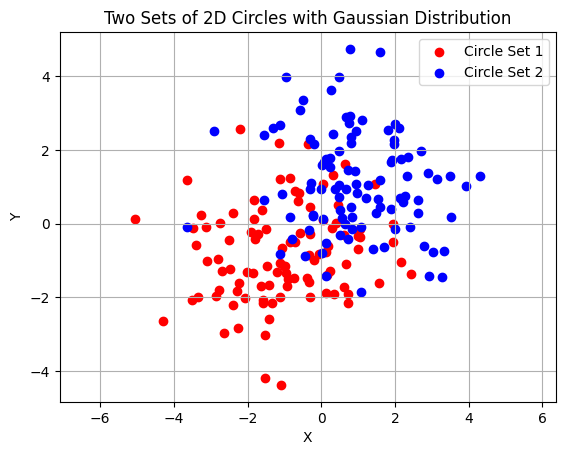

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(5)

# Generate random points for the first circle set
num_samples = 100
mean_center1 = [-1, -1]
covariance1 = [[2, 0], [0, 2]]  # Increase covariance for more spread out distribution
circle_set1 = np.random.multivariate_normal(mean_center1, covariance1, num_samples)

# Generate random points for the second circle set
mean_center2 = [1, 1]
covariance2 = [[2, 0], [0, 2]]  # Increase covariance for more spread out distribution
circle_set2 = np.random.multivariate_normal(mean_center2, covariance2, num_samples)

# Plot the points for the first circle set
plt.scatter(circle_set1[:, 0], circle_set1[:, 1], label='Circle Set 1', color='red')

# Plot the points for the second circle set
plt.scatter(circle_set2[:, 0], circle_set2[:, 1], label='Circle Set 2', color='blue')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Two Sets of 2D Circles with Gaussian Distribution')
plt.legend()
plt.axis('equal')  # Equal aspect ratio for a better visualization
plt.grid(True)
plt.show()


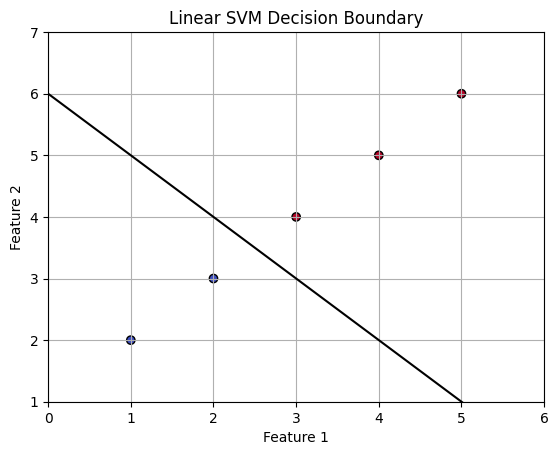

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Example data (replace with your own data)
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# Train linear SVM model
svm = SVC(kernel='linear')
svm.fit(X, y)

# Retrieve coefficients and intercept
coef = svm.coef_[0]
intercept = svm.intercept_

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx = np.linspace(x_min, x_max)
yy = (-coef[0] / coef[1]) * xx - intercept / coef[1]
plt.plot(xx, yy, 'k-')

# Set plot limits and labels
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear SVM Decision Boundary')
plt.grid(True)
plt.show()


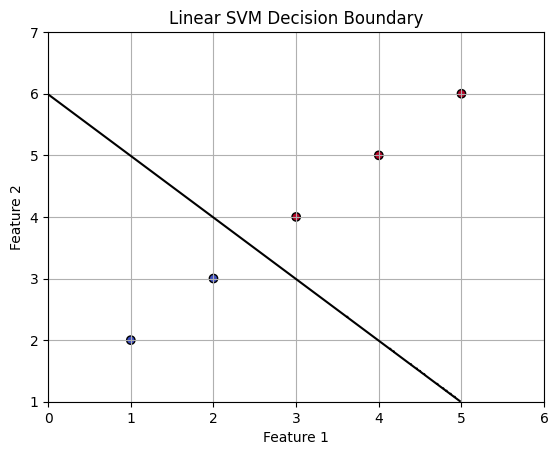

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Example data (replace with your own data)
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# Train linear SVM model
svm = SVC(kernel='linear')
svm.fit(X, y)

# Retrieve coefficients and intercept
coef = svm.coef_[0]
intercept = svm.intercept_

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', linestyles=['-'], levels=[0])

# Set plot limits and labels
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear SVM Decision Boundary')
plt.grid(True)
plt.show()
